# Introduction
In human language, words are often used in several contexts. For distinct Natural Language Processing Applications, it's essential to understand the language's various usage patterns. The same word might have numerous meanings 
depending on the context. These “difficult” words are more generally referred to as **homonyms.**

<h3><b>Examples of Homonyms</b></h1>
<a href='https://www.twinkl.it/teaching-wiki/homonym#:~:text=One%20of%20the%20most%20common,exactly%20the%20same%20way%2C%20too.'>https://www.twinkl.it/teaching-wiki/homonym#:~:text=One%20of%20the%20most%20common,exactly%20the%20same%20way%2C%20too.' </a>

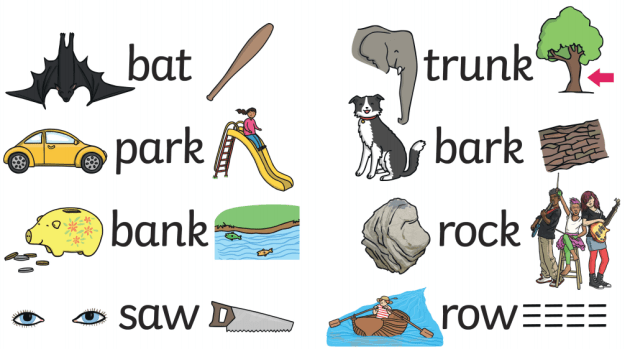



Let's take the word **"bark"** as an example:

*   “Cinnamon comes from the bark of the Cinnamon tree.”
*   “The dog barked at the stranger.”

Both sentences use the word “bark”, but sentence 1 refers to the outer covering of the tree. While sentence 2 refers to the sound made by a dog. 

Therefore, it is clear that the same words can have multiple meanings depending on how they are used in a given sentence. A lot of a word's meaning is defined by how it is used. However, the issue is that when working with text data in NLP, we need a way to interpret the different words' different meanings. To solve this issue WSD (Word Sense Disambiguation) comes into play.



---




## What is Word Sense Disambiguation?
An important NLP technique for determining a word's meaning in the context is called word sense disambiguation. It can be difficult for NLP systems to identify words correctly, therefore it might be useful to know how a word is used in a given sentence.

**In this Notebook, I am designing Coarse-Grained WSD as Multiclass Token Classification**.

Where our input is (Instance_ids, lemmas, words, pos_tags, candidates) our aim to predict (senses - gold homonymy clusters)
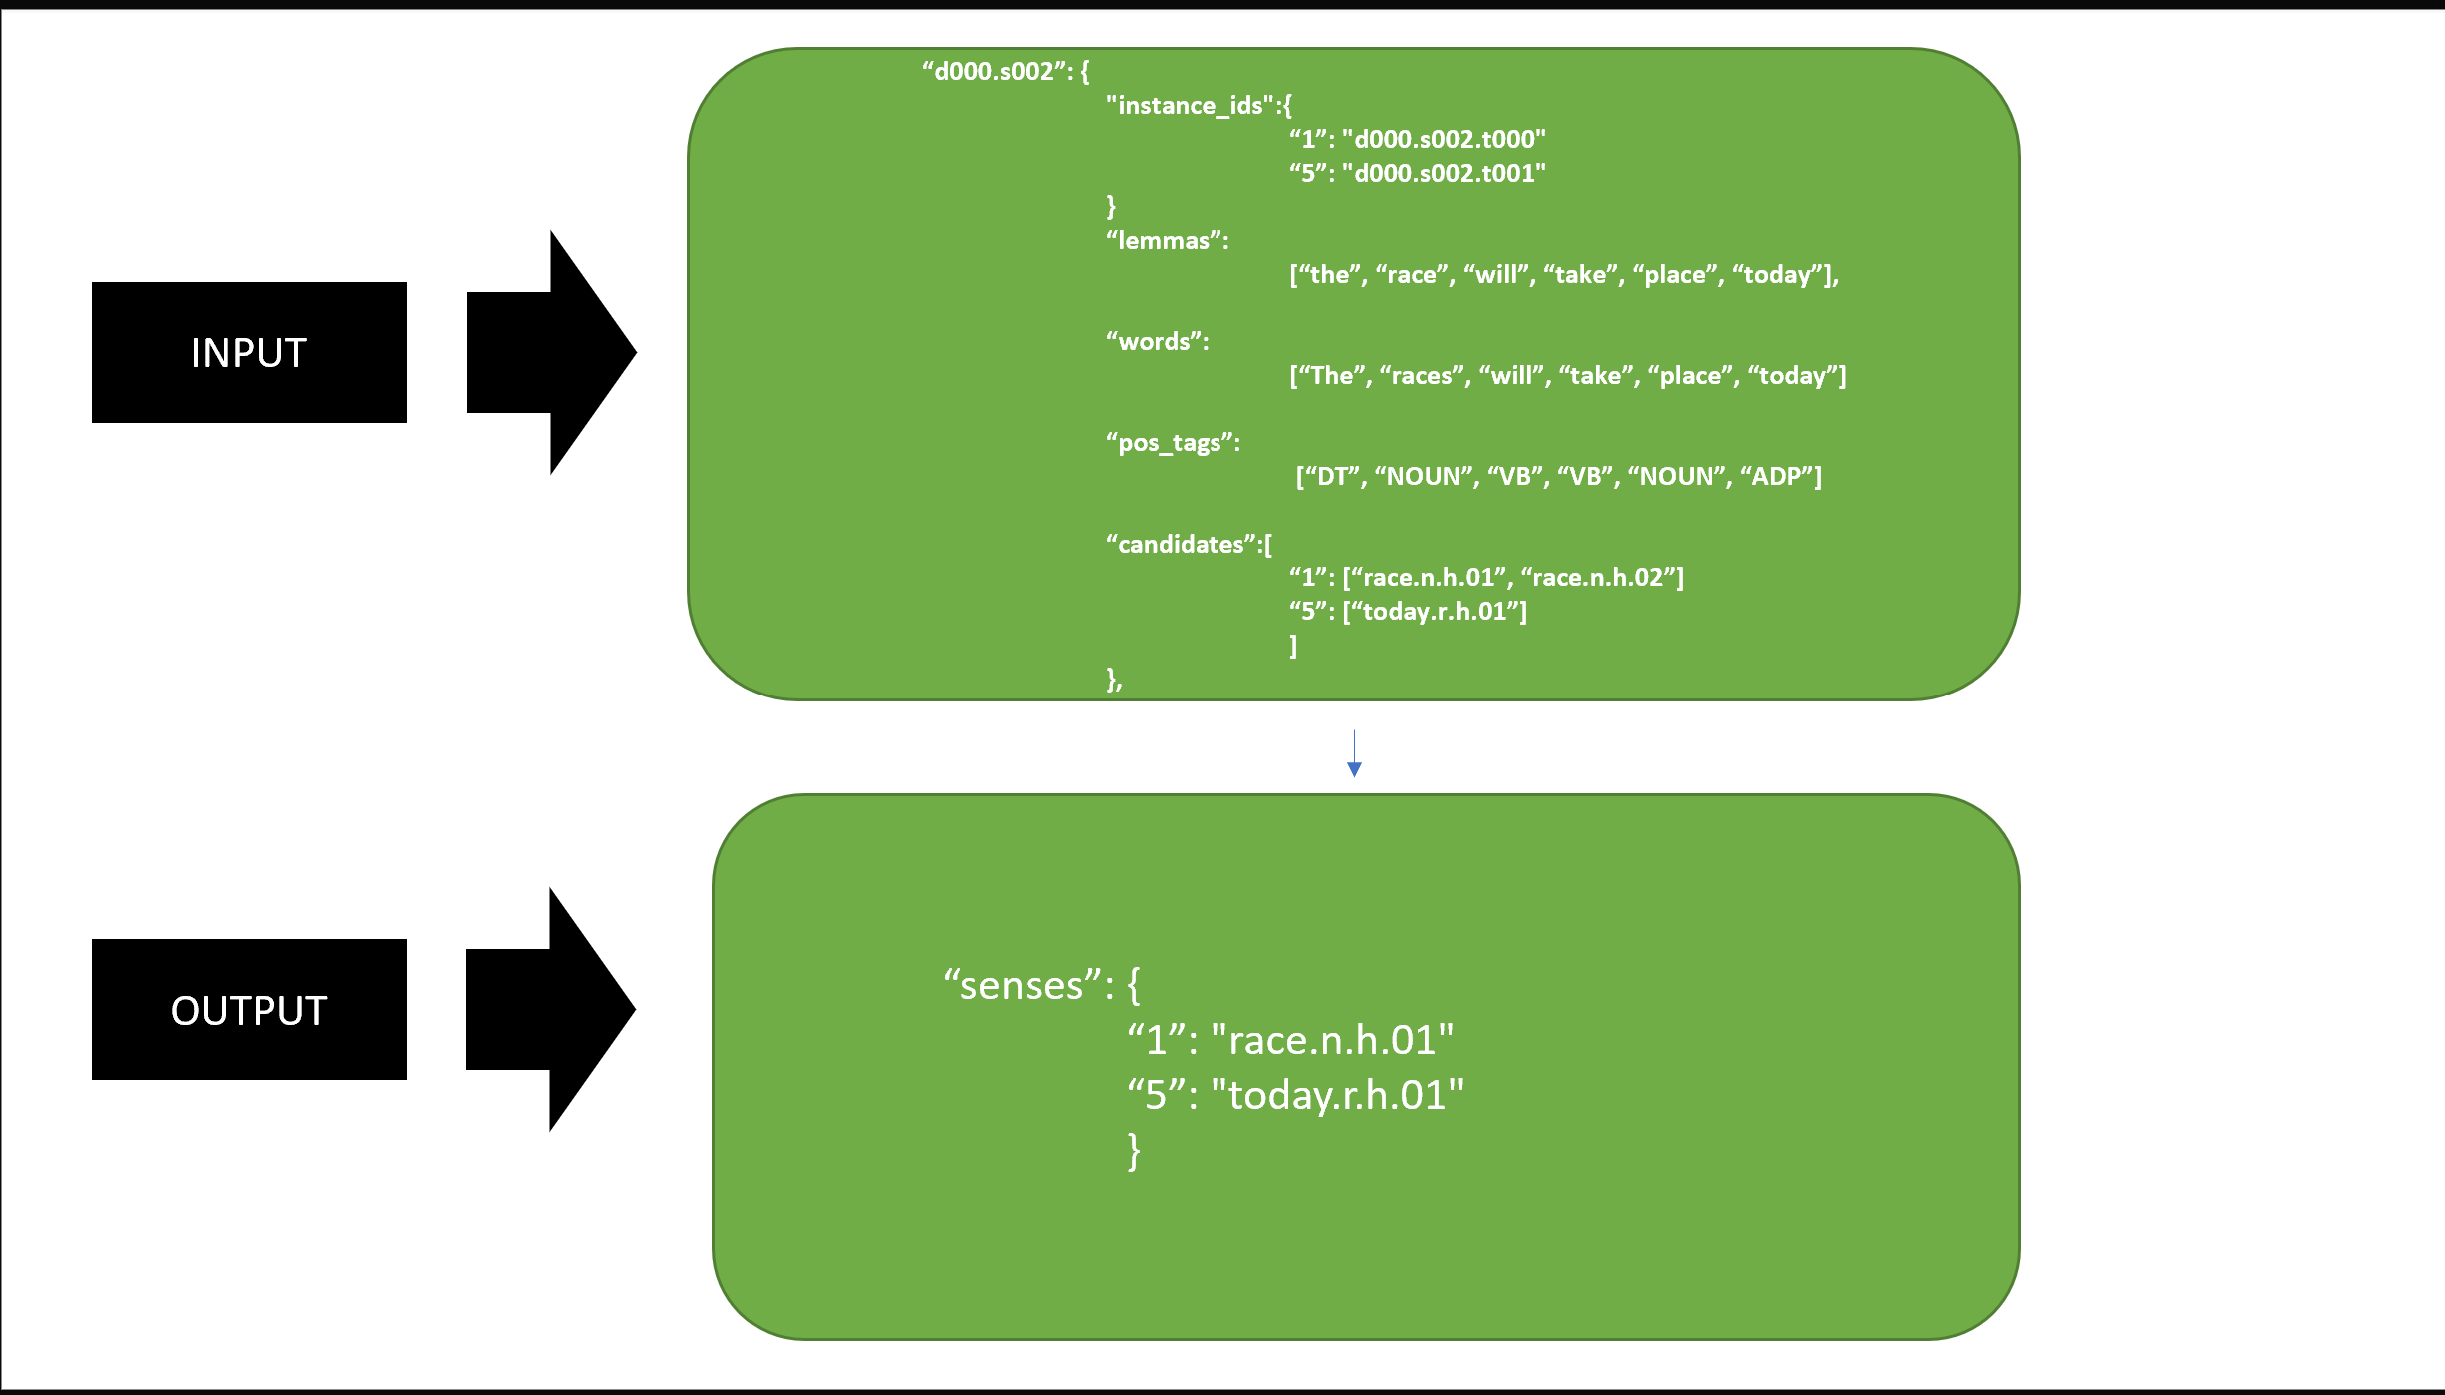

## First thing first let's install some useful libraries.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=4d649e0b9fbae7687ef0c5a95812a5595a45b8b3d66b1a3718dd61b5e4d4e6e1
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


## Let's have a look at Colab GPU Details.
Here, I am using Colab NVIDIA® Tesla® T4 GPU

In [ ]:
!nvidia-smi

Mon May 29 00:45:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Libraries Import 
Import some libraries that we will need throughout this notebook.

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import pandas as pd

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,TensorDataset,DataLoader
import torch.nn.functional as F

from tqdm import tqdm

from time import sleep

import sklearn
from sklearn.metrics import confusion_matrix

import seaborn as sns

import transformers
from transformers import RobertaTokenizerFast
from transformers import AutoModel
from transformers import AdamW

from seqeval.metrics.sequence_labeling import accuracy_score

from typing import Tuple, List, Any, Dict

import datasets
from datasets import load_metric

from google.colab import drive

from datasets import load_metric
import warnings

from typing import Tuple, List, Any, Dict

import gensim
import gensim.downloader

torch.manual_seed(0)

## Let's check Python and Python libraries versions (that I am using in this notebook). 
Because it's beneficial for those who will run this notebook other then me.

In [ ]:
! python --version

Python 3.10.11


In [ ]:
print('Matplotlib Version : ',matplotlib._get_version())
print('Pandas Version : ',pd.__version__)
print("Numpy Version : ",np.__version__)
print("Torch Version : ",torch.__version__)
print("Sklearn Version : ",sklearn.__version__)
print("Seaborn Version : ",sns.__version__)
print("Transformers Version : ",transformers.__version__)
print("Datasets Version : ",datasets.__version__)

Matplotlib Version :  3.7.1
Pandas Version :  1.5.3
Numpy Version :  1.22.4
Torch Version :  2.0.1+cu118
Sklearn Version :  1.2.2
Seaborn Version :  0.12.2
Transformers Version :  4.29.2
Datasets Version :  2.12.0


## Check GPU is availabe or not?
If it's available then save 'cuda:0' into device variable otherwise save 'cpu' into device variable.

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Connect to Google Drive

Here, I am connecting Google Drive with this notebook. It's useful to save model checkpoints, lists of words, and lists of senses directly to Drive, rather than saving them repeatedly to the Colab files section.

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


## Read Data File



1.   The data file is packed in a zip folder, so we need to unzip it first.
2.   Upon unzipping, we obtain three different folders: coarse-grained, fine-grained, and map. Our main task involves using the 'coarse-grained' folder, so I will focus on this. 
3. Creating variables for the training, testing, and validation paths of the 'coarse-grained' JSON files is beneficial as it allows us to directly use these variables instead of hard-coding the paths repeatedly.




In [ ]:
!tar -xzvf "/content/drive/MyDrive/NLP-HW2/data.tar.gz"

coarse-grained/
coarse-grained/test_coarse_grained.json
coarse-grained/train_coarse_grained.json
coarse-grained/val_coarse_grained.json
fine-grained/
fine-grained/test_fine_grained.json
fine-grained/train_fine_grained.json
fine-grained/val_fine_grained.json
map/
map/coarse_fine_defs_map.json


In [ ]:
train_path = '/content/coarse-grained/train_coarse_grained.json'
test_path = '/content/coarse-grained/test_coarse_grained.json'
val_path = '/content/coarse-grained/val_coarse_grained.json'

## Read JSON files and drop NA values



1.   I am using the pandas library to read JSON files.
2.   Since data files often contain NA values, it is advisable to handle them by either filling them with appropriate values or dropping them. In this case, I am using the drop NA approach, which is a built-in command in pandas.


> Here, we have different inputs (independent variables), So I am taken `words` as input, and `senses` as the output.

> Why do I choose only `words` as input? because in this case, I am trying to make a simple model, If our model will not give better accuracy I have to choose multiple variables as input to enhance model accuracy.





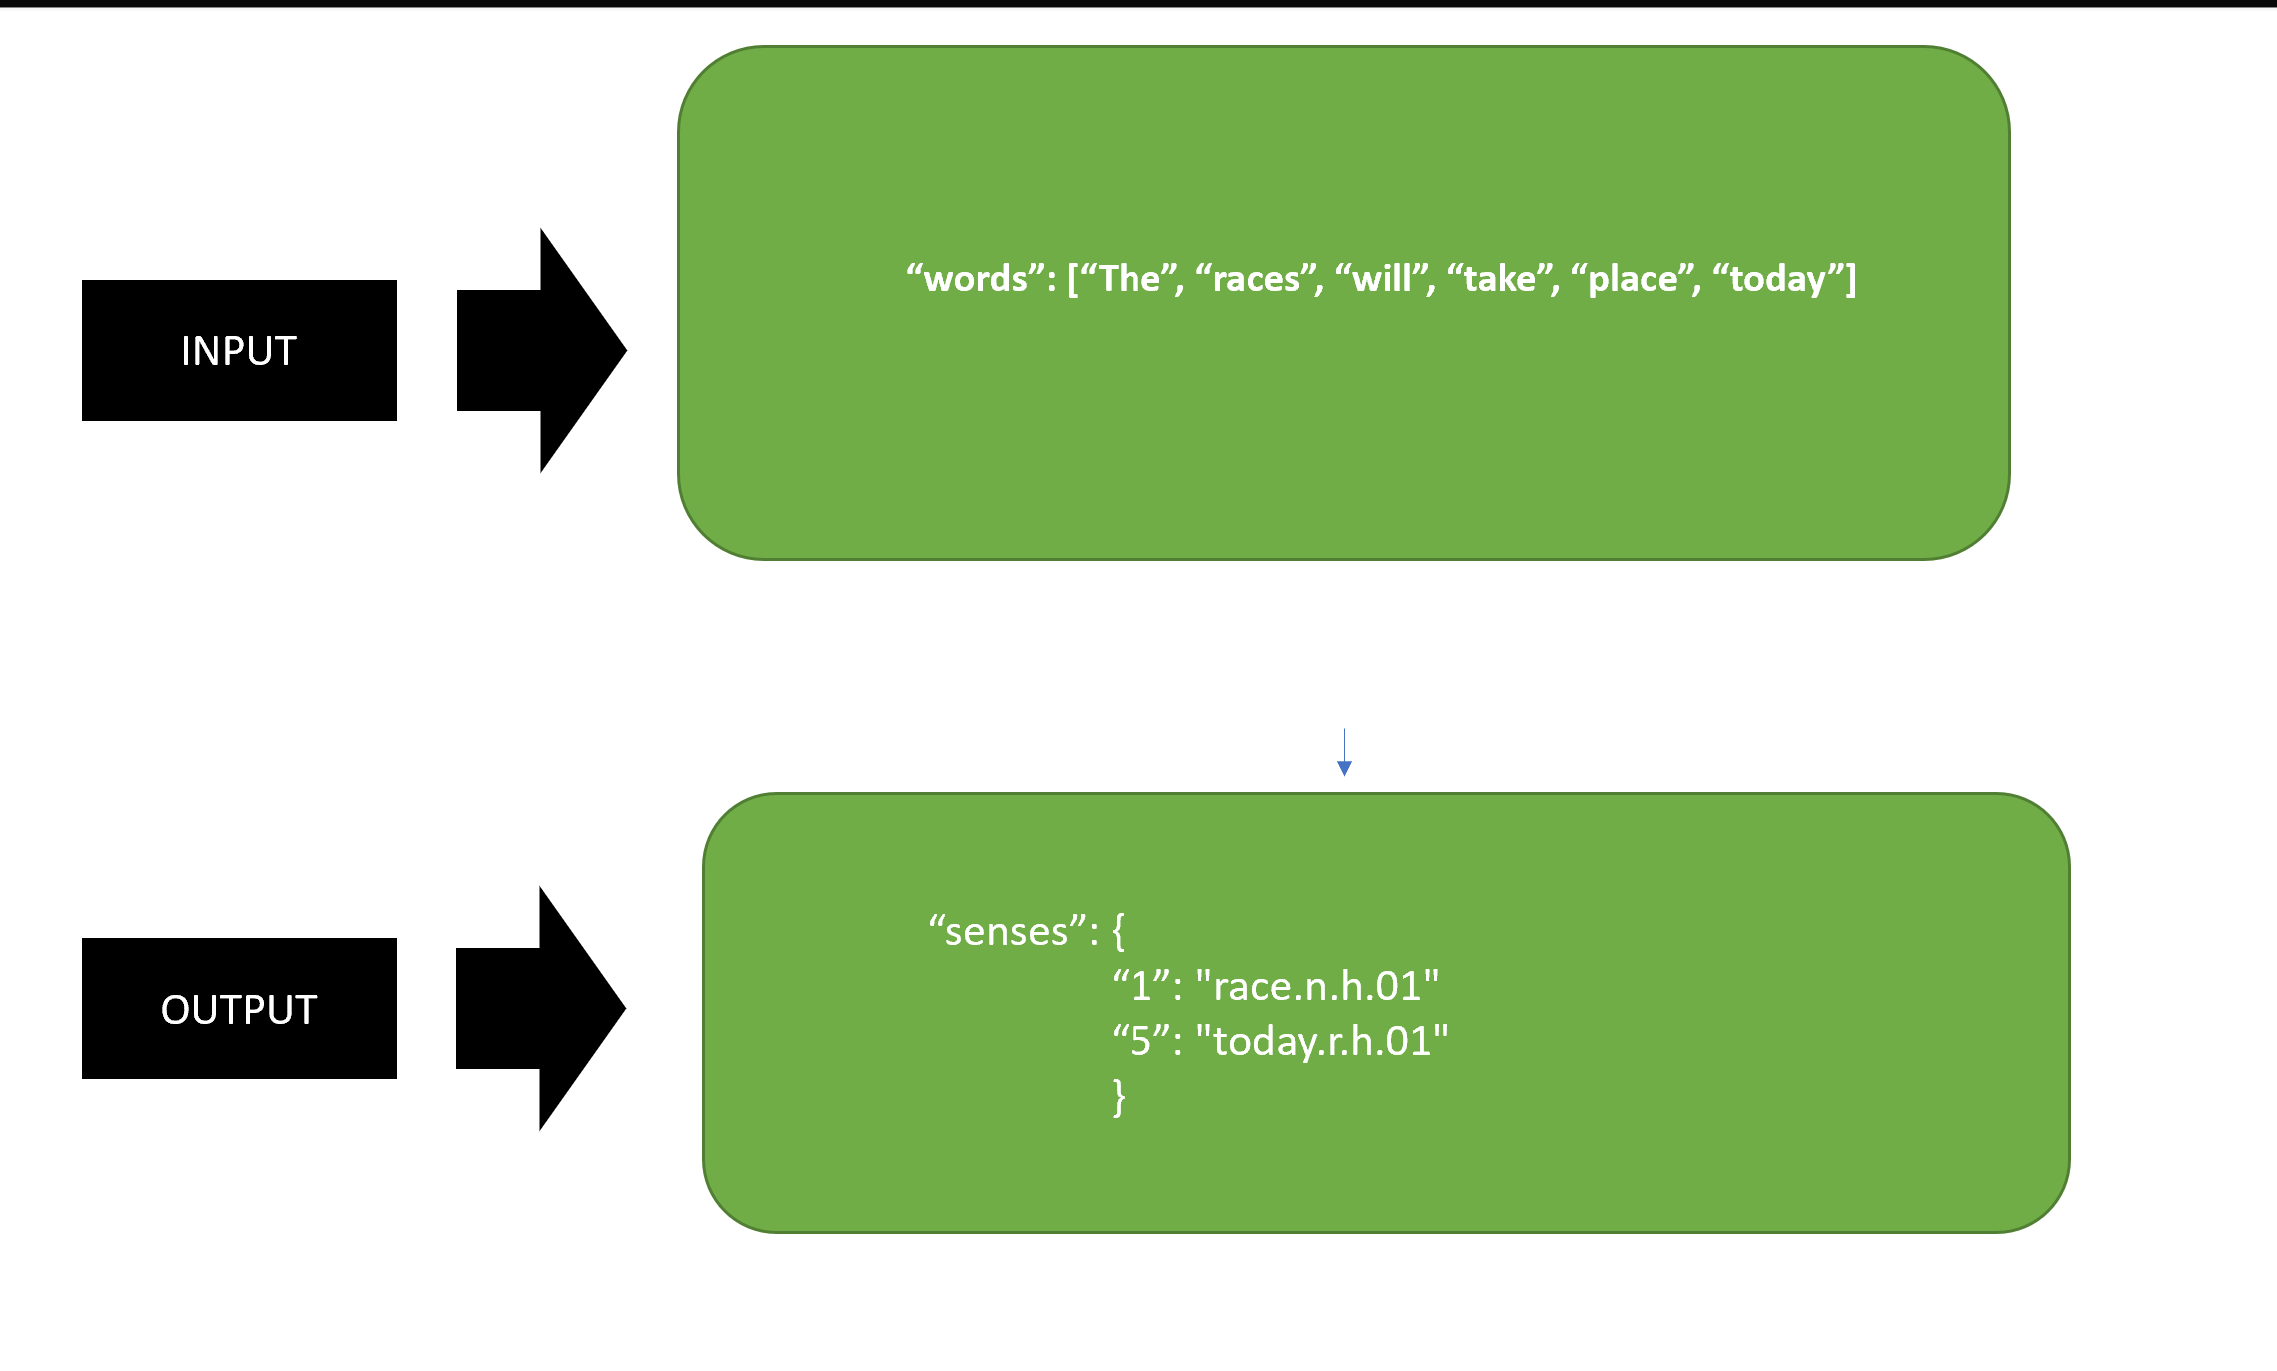





In [ ]:
df_train = pd.read_json(train_path)
df_test = pd.read_json(test_path)
df_val = pd.read_json(val_path)

In [ ]:
df_train = df_train.dropna()
df_test = df_test.dropna()
df_val = df_val.dropna()

# Identification of Independent and Dependent Variables in Pandas Dataframe Visualization

Now, in this code, I am using a pandas dataframe to visualize. What is the input (independent variable) and what is the output (dependent variable)?

In [ ]:
df_train.T.head()

,instance_ids,lemmas,pos_tags,senses,words,candidates
d049.s041,"{'52': 'd049.s041.t001', '69': 'd049.s041.t011'}","[person, ,, after, leave, location, in, august...","[NOUN, ., ADP, VERB, NOUN, ADP, NOUN, NUM, ., ...","{'52': ['mi.n.h.06'], '69': ['us.n.h.02']}","[Bailly, ,, after, leaving, Fort Snelling, in,...","{'52': ['knot.n.h.01', 'mil.n.h.03', 'mi.n.h.0..."
d045.s051,{'24': 'd045.s051.t000'},"[he, be, good, and, they, know, that, what, he...","[PRON, VERB, ADJ, CONJ, PRON, VERB, ADP, PRON,...",{'24': ['rest.v.h.02']},"[He, was, good, and, they, knew, that, what, h...","{'24': ['stay.v.h.02', 'rest.v.h.02', 'stay.v...."
d033.s026,{'30': 'd033.s026.t003'},"[the, group, of, group, have, estimate, that, ...","[DET, NOUN, ADP, NOUN, VERB, VERB, ADP, ADJ, A...",{'30': ['pupil.n.h.01']},"[The, National Manpower Council, of, Columbia ...",{'30': ['pupil.n.h.01']}
d150.s063,"{'34': 'd150.s063.t014', '39': 'd150.s063.t017'}","[person, have, to, admit, that, though, he, co...","[NOUN, VERB, PRT, VERB, ADP, ADP, PRON, VERB, ...","{'34': ['sound.v.h.01'], '39': ['player.n.h.01']}","[Rousseau, had, to, admit, that, though, he, c...","{'34': ['sound.v.h.01', 'sound.v.h.02'], '39':..."
d160.s067,"{'6': 'd160.s067.t003', '11': 'd160.s067.t006'...","[then, during, washing, ,, the, greasy, soil, ...","[ADV, ADP, NOUN, ., DET, ADJ, NOUN, VERB, ADV,...","{'6': ['soil.n.h.02'], '11': ['border.n.h.02']...","[Then, during, washing, ,, the, greasy, soil, ...","{'6': ['soil.n.h.01', 'soil.n.h.02', 'land.n.h..."


In [ ]:
print('------- Input -------')
print()
print('(instance_ids)  -----> ', df_train.T.instance_ids[0])
print('(lemmas)  -----> ', df_train.T.lemmas[0])
print('(pos_tags)  -----> ', df_train.T.pos_tags[0])
print('(words)  -----> ', df_train.T.words[0])
print('(candidates)  -----> ', df_train.T.candidates[0])
print()
print()
print('------- Output -------')
print()
print('(senses)  -----> ', df_train.T.senses[0])

------- Input -------

(instance_ids)  ----->  {'52': 'd049.s041.t001', '69': 'd049.s041.t011'}
(lemmas)  ----->  ['person', ',', 'after', 'leave', 'location', 'in', 'august', '1821', ',', 'be', 'force', 'to', 'leave', 'some', 'of', 'the', 'cattle', 'at', 'the', 'group', 'post', 'on', 'location', '``', 'in', 'the', 'location', "''", 'and', 'reach', 'location', ',', 'as', 'the', 'person', 'group', 'center', 'be', 'now', 'call', ',', 'late', 'in', 'the', 'fall', '.', 'he', 'set_out', 'on', 'he', '700', '-', 'mile', 'return', 'journey', 'with', 'five', 'family', 'of', 'discontented', 'and', 'disappoint', 'swiss', 'who', 'turn', 'they', 'eye', 'toward', 'the', 'united_states', '.']
(pos_tags)  ----->  ['NOUN', '.', 'ADP', 'VERB', 'NOUN', 'ADP', 'NOUN', 'NUM', '.', 'VERB', 'VERB', 'PRT', 'VERB', 'DET', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'NOUN', 'ADP', 'NOUN', '.', 'ADP', 'DET', 'NOUN', '.', 'CONJ', 'VERB', 'NOUN', '.', 'ADP', 'DET', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'ADV', 'VERB', '.

In [ ]:
def get_instence_ids(data):
  instence_ids_list = []
  for instence_ids in data:
    i_id = []
    for instence_id in instence_ids.keys():
      i_id.append(int(instence_id))
    instence_ids_list.append(i_id)
  return instence_ids_list

In [ ]:
instence_ids_list_train = get_instence_ids(df_train.T.instance_ids)
instence_ids_list_test = get_instence_ids(df_test.T.instance_ids)
instence_ids_list_val = get_instence_ids(df_val.T.instance_ids)

In [ ]:
instence_ids_list_train[:5]

[[52, 69], [24], [30], [34, 39], [6, 11, 23, 27]]

## Approach


> WSD is usually framed as a multiclass classification problem where the classes belong to a specific Sense Inventory.




So my approch is:

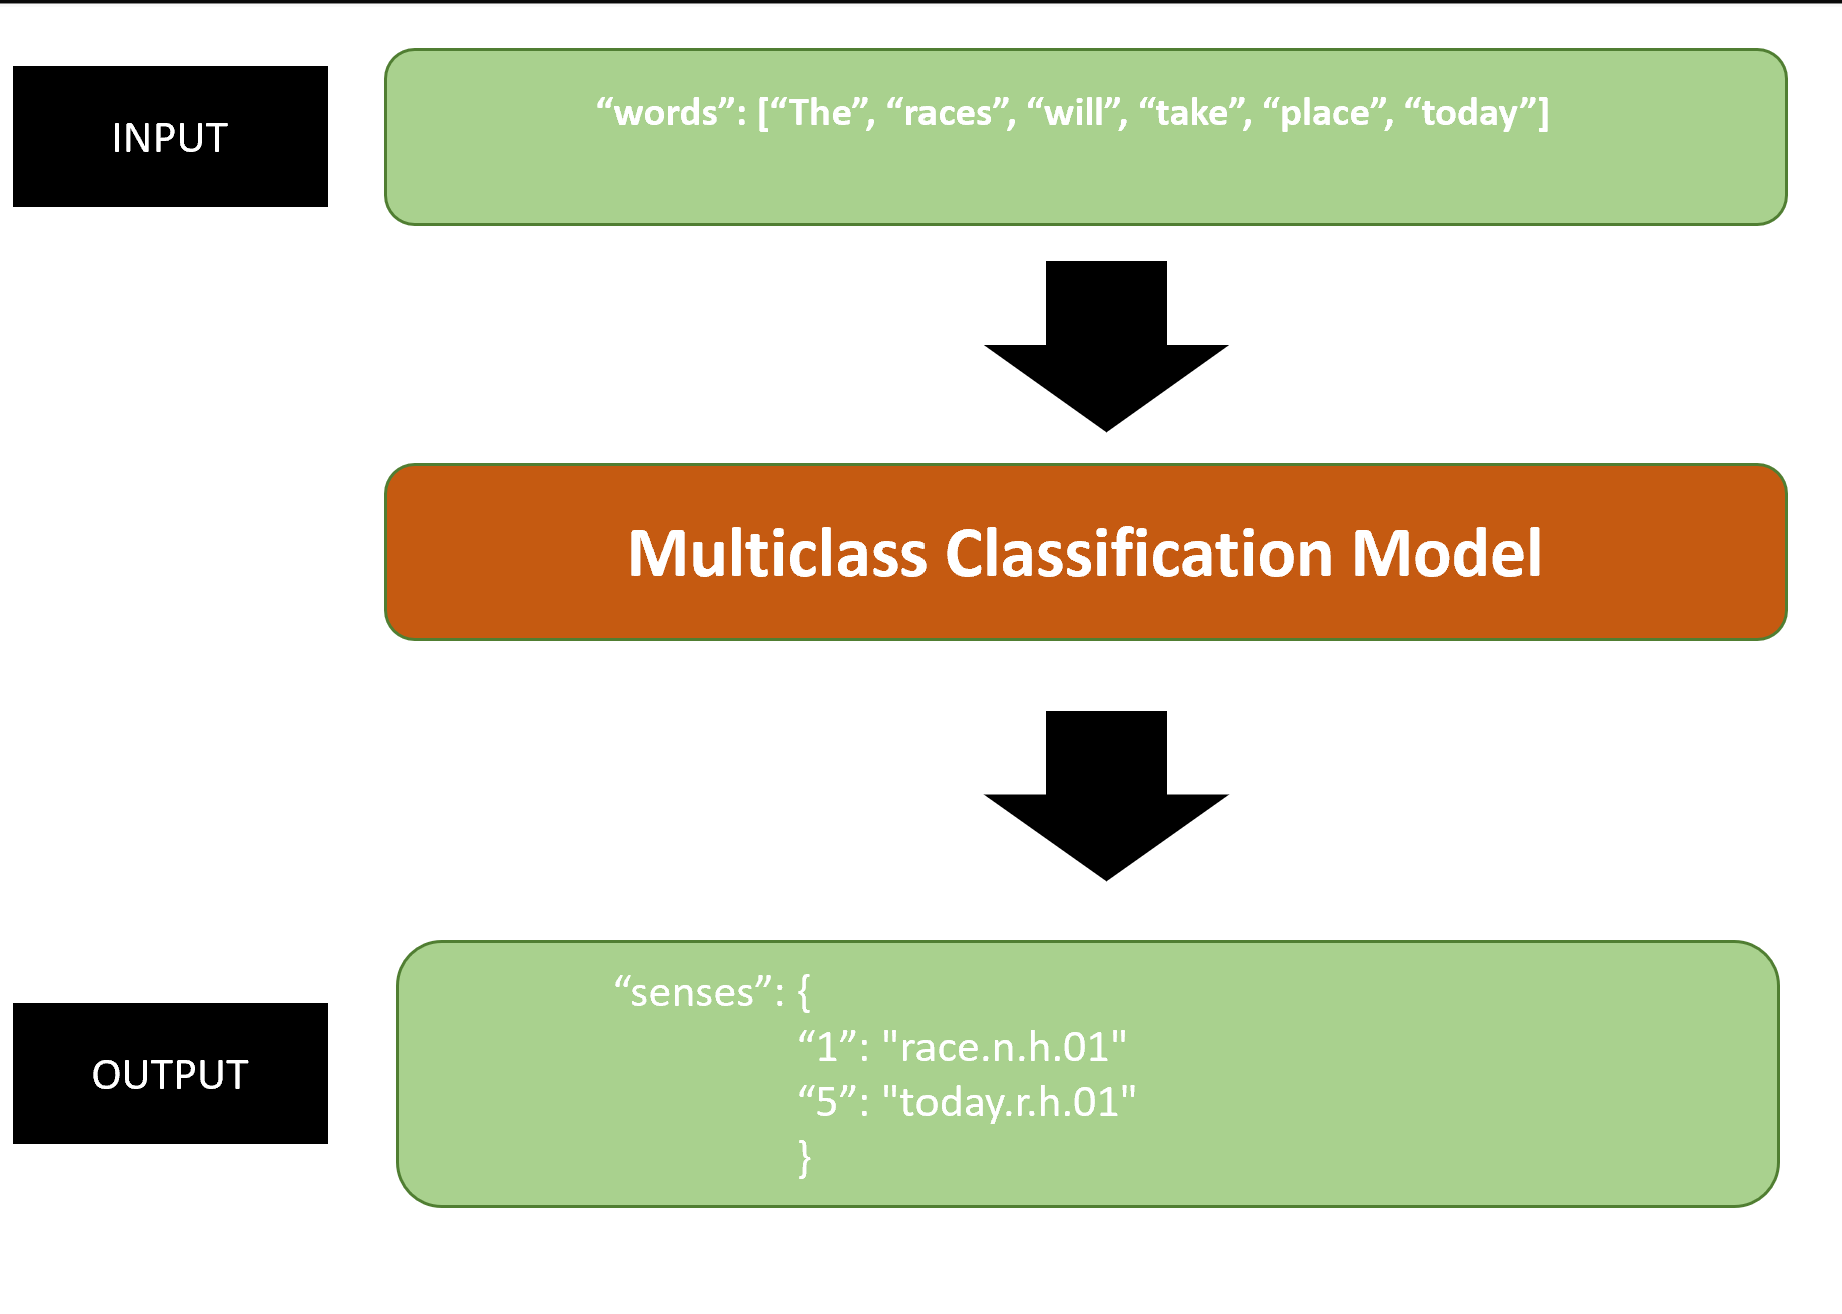




# Data Preprocessing

We find out input and output, It's time for data preprocessing.

Data preprocessing involves transforming and manipulating the data to prepare it for analysis or modeling.

## Convert Words in Lower Case
---

Converting Words into lowercase is the preprocessing technique where it will ensure consistency, simplifies text matching, and reduces the vocabulary size by treating words with different capitalizations as the same word.

In [ ]:
def tokens_lower(tokens_values):
  tokens = []
  for num in tqdm(range(len(tokens_values))):
    tokens.append(list(map(str.lower,tokens_values[num])))
  return tokens

In [ ]:
df_words_train = tokens_lower(list(df_train.T.words.values))
df_words_test = tokens_lower(list(df_test.T.words.values))
df_words_val = tokens_lower(list(df_val.T.words.values))

100%|██████████| 685/685 [00:00<00:00, 113660.03it/s]


In [ ]:
print("Before Lower Case",df_train.T.words.values[0])
print("After Lower Case",df_words_train[0])

Before Lower Case ['Bailly', ',', 'after', 'leaving', 'Fort Snelling', 'in', 'August', '1821', ',', 'was', 'forced', 'to', 'leave', 'some', 'of', 'the', 'cattle', 'at', 'the', "Hudson's Bay Company's", 'post', 'on', 'Lake Traverse', '``', 'in', 'the', 'Sieux Country', "''", 'and', 'reached', 'Fort Garry', ',', 'as', 'the', 'Selkirk', "Hudson's Bay Company", 'center', 'was', 'now', 'called', ',', 'late', 'in', 'the', 'fall', '.', 'He', 'set out', 'on', 'his', '700', '-', 'mile', 'return', 'journey', 'with', 'five', 'families', 'of', 'discontented', 'and', 'disappointed', 'Swiss', 'who', 'turned', 'their', 'eyes', 'toward', 'the', 'United States', '.']
After Lower Case ['bailly', ',', 'after', 'leaving', 'fort snelling', 'in', 'august', '1821', ',', 'was', 'forced', 'to', 'leave', 'some', 'of', 'the', 'cattle', 'at', 'the', "hudson's bay company's", 'post', 'on', 'lake traverse', '``', 'in', 'the', 'sieux country', "''", 'and', 'reached', 'fort garry', ',', 'as', 'the', 'selkirk', "hudso

## Steps to handle sense keys

We have inputs (words) as well as outputs (senses), but the problem is that the length of the words is not equal to the length of the senses (as shown in the image below). In multi-class classification models, it is necessary for the input and output lengths to match in order to train the model effectively, because each input is associated with a single output class label. The goal is to classify each input into one of several predefined classes. So fot that we take some steps to convert senses into equal length of the words.


1.   In our dataset, we have different types of sense keys in various positions.
2.   Next, we convert this dictionary into a list and assign the sense keys to their corresponding positions. However, a challenge arises for words that do not have a 'Sense-Key'.
3. For those words without a 'Sense-Key,' I assign the `'__PADDING__'` key. This  `'__PADDING__' ` key, I will ignore during training, as I do not need to train words that are homonymous. 

The above steps will done by call `apply_no_senseKey` function.



---


Note:
The key `'__PADDING__' `is used for two purposes:

Handling Words without Sense Key: The `'__PADDING__`' key is assigned to words that do not have a corresponding sense key. This allows to represent and handle words that are considered homonymous or have no specific sense association.

Padding for Variable Length Inputs: Additionally, the same `'__PADDING__'` key is used for actual padding when the input sequences are not of the same length. Padding involves adding extra tokens (in this case, the` '__PADDING__'` key) to shorter sequences to match the length of the longest sequence in the dataset.

Why we use same `__PADDING__` key for both problem. because in loss function (CrossEntropyLoss) we only ignore one key not two, and we need to ignore both things. 

---





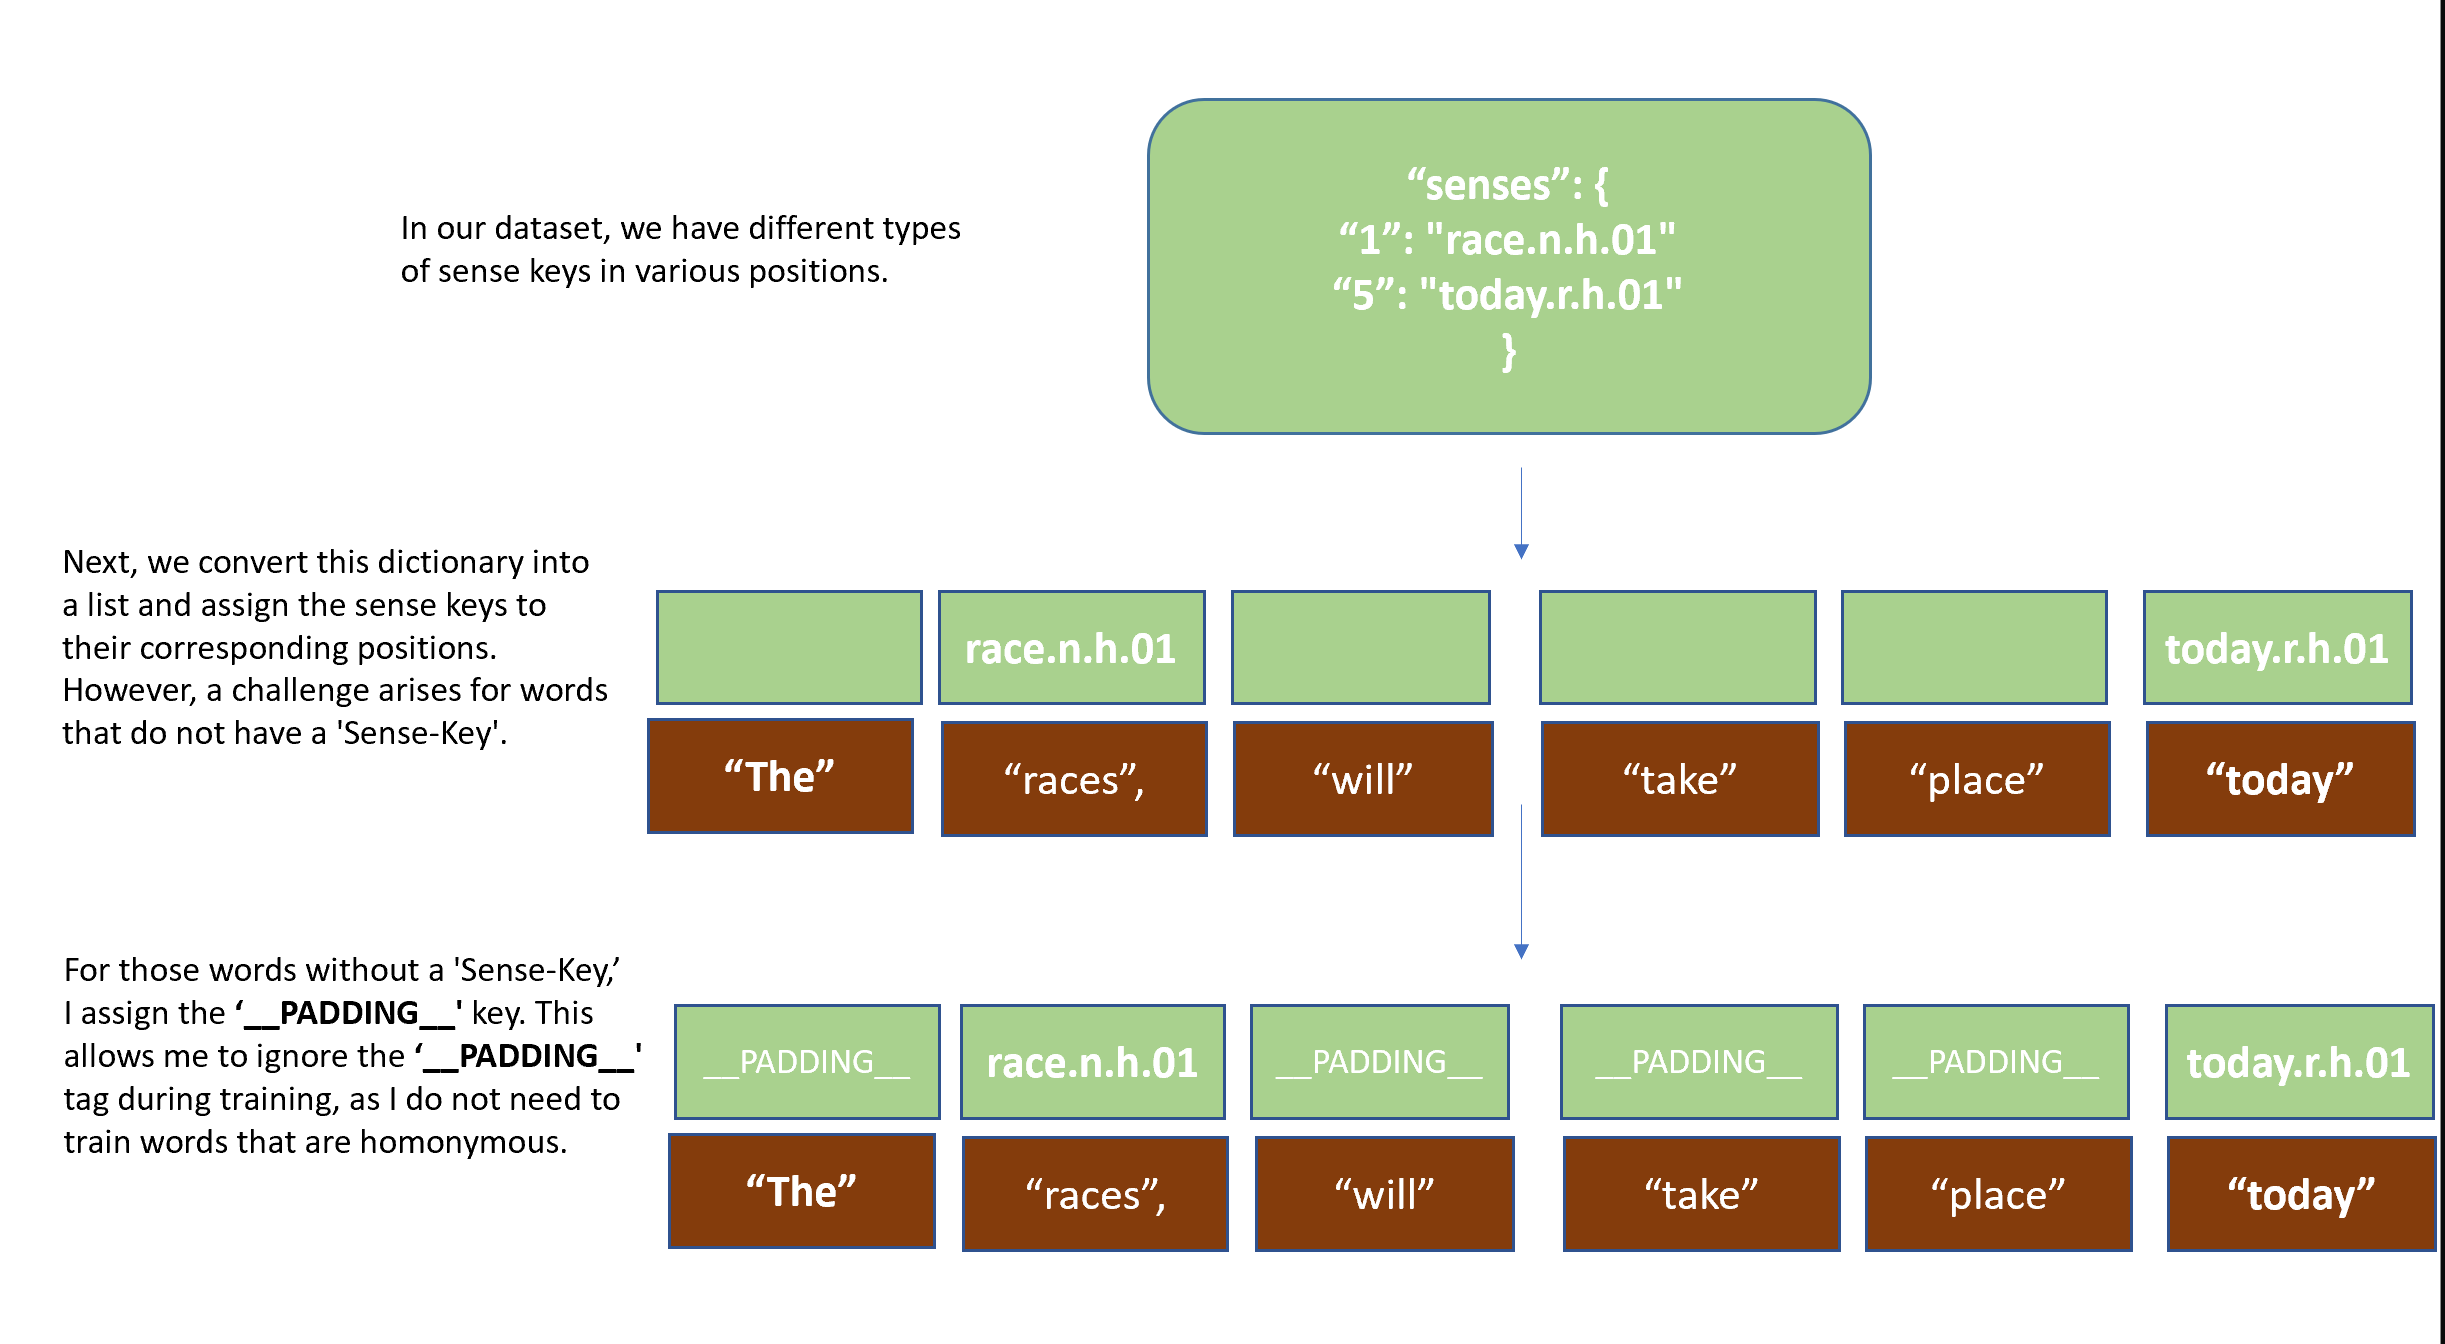

In [ ]:
def apply_no_senseKey(sense_value,df_words):
  no_sense_key = []
  for i in tqdm(range(len(sense_value))):
    list_of_sense = ["__PADDING__"]*len(df_words[i])
    for k,v in sense_value[i].items():
      list_of_sense[int(k)]=v[0]
    no_sense_key.append(list_of_sense)
  return no_sense_key

In [ ]:
df_sense_train = apply_no_senseKey(df_train.T.senses.values,df_words_train)
df_sense_test = apply_no_senseKey(df_test.T.senses.values,df_words_test)
df_sense_val = apply_no_senseKey(df_val.T.senses.values,df_words_val)

100%|██████████| 685/685 [00:00<00:00, 378936.72it/s]


In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
print('')
print(color.CYAN + '--------------------------------------- Word --------------------------------------- '+ color.END)
print('')
print("Word ------->",df_words_train[0])
print('')
print('')
print(color.CYAN + '--------------------------------------- Sense Key --------------------------------------- '+ color.END)
print('')
print("Senses ------->",[v[0] for k,v in df_train.T.senses.values[0].items()])
print('')
print('')
print(color.CYAN + '-------------------------- After apply __PADDING__ Sense key -------------------------- '+ color.END)
print('')
print(df_sense_train[0])


--------------------------------------- Word --------------------------------------- 

Word -------> ['bailly', ',', 'after', 'leaving', 'fort snelling', 'in', 'august', '1821', ',', 'was', 'forced', 'to', 'leave', 'some', 'of', 'the', 'cattle', 'at', 'the', "hudson's bay company's", 'post', 'on', 'lake traverse', '``', 'in', 'the', 'sieux country', "''", 'and', 'reached', 'fort garry', ',', 'as', 'the', 'selkirk', "hudson's bay company", 'center', 'was', 'now', 'called', ',', 'late', 'in', 'the', 'fall', '.', 'he', 'set out', 'on', 'his', '700', '-', 'mile', 'return', 'journey', 'with', 'five', 'families', 'of', 'discontented', 'and', 'disappointed', 'swiss', 'who', 'turned', 'their', 'eyes', 'toward', 'the', 'united states', '.']


--------------------------------------- Sense Key --------------------------------------- 

Senses -------> ['mi.n.h.06', 'us.n.h.02']


-------------------------- After apply __PADDING__ Sense key -------------------------- 

['__PADDING__', '__PADDING__

## Find out Unique Words and Senses
---

Now we have inputs (words) and output (senses), Now it's time to make a list of unique senses and unique words of **"TRAIN DATA"** by call `unique_tokens() `function . Building unique vocabs is essential for effective NLP tasks as it enables word representation, standardized input processing, vocabulary size management, and out-of-vocabulary handling. Now here we have to find out 

**Note**: If we have previously unique Words file and senses file skip this part. Otherwise coninue this part.




In [ ]:
def unique_tokens(tokens_list,tag=True):
  unique_tokens = []
  for tokens in tokens_list:
    for token in tokens:
      if tag == True and token == '__PADDING__': # here i don't want to save __PADDING__ as my unique sense key
        pass
      else:
        unique_tokens.append(token)
  return set(unique_tokens)

In [ ]:
words = unique_tokens(df_words_train)
senses_keys = unique_tokens(df_sense_train,tag=True)

print("Total Number of Unique Words :",len(words))
print([word for word in words])
print("Total Number of Unique Senses :",len(senses_keys))
print([sense for sense in senses_keys])

Total Number of Unique Words : 31974
['clay', 'stumbling', 'furlongs', 'possibility', 'knowledge', 'sagebrush', 'magnetic', 'wetness', 'enforcing', 'meteorite', 'surreptitiously', 'hummed', 'forty-third', 'subtracted', 'nbc', 'parish', 'leprosy', 'copenhagen university', 'full-fledged', 'opalescent', 'failing', 'sante', '1213', 'mclendon', 'planned parenthood federation', 'pornsen', 'armisteads', 'hospitalization', 'pilgrimage', 'synthesized', 'mrs. monmouth', 'cd', 'realize', 'likelihood', 'comradeship', 'elected', 'wobble', 'bullet holes', 'cytoplasm', '.2', 'wards', 'staging', 'shaping', 'hesitated', 'new testament', 'politician', 'why', 'calcium lactate', 'submerged', 'step-by-step', 'mechanics', 'swarms', 'shawl', 'looked back', 'gathering', 'norms', 'verification', 'drugstore', 'surely', 'west side', 'holders', 'arrangement', 'quarter-mile', 'viola', 'income', 'fig', 'militia', 'babbiting', 'association for the promotion of the unity of christendom', 'used to', 'as well', 'befogg

### Saved Unique Words and Tags
---
This vocabs and senses is unique, We have to use this in prediction time. So for that we need to save it. For saving we need to call `save_vocab()` function for words and `save_senses()` function for senses.

In [ ]:
def save_vocab(vocab,file_name):
  with open(file_name, 'w') as fp:
      for item in list(vocab):
          fp.write("%s\n" % item)
      print(f'Vocabs Saved in {file_name} path')


def save_senses(senses,file_name):
  with open(file_name, 'w') as fp:
      for item in list(senses):
          fp.write("%s\n" % item)
      print(f'Senses Saved in {file_name} path')

In [ ]:
save_vocab(words,'/content/drive/MyDrive/NLP-HW2/words.txt')
save_senses(senses_keys,'/content/drive/MyDrive/NLP-HW2/senses.txt')

Vocabs Saved in /content/drive/MyDrive/NLP-HW2/words.txt path
Senses Saved in /content/drive/MyDrive/NLP-HW2/senses.txt path


## Load Words and senses File
---
If we have unique words file and senses file previously then load it by calling `get_vocabs()` function for words, and `get_senses()` function for senses. otherwise skip it this part.

In [ ]:
def get_vocabs(file_path_vocab):
  vocabs = []

  
  with open(file_path_vocab, 'r') as fp:
      for line in fp:
          
          x = line[:-1]

          vocabs.append(x)
  return vocabs


def get_senses(file_path_senses):
   
  senses = []

  
  with open(file_path_senses, 'r') as fp:
      for line in fp:         
          x = line[:-1]        
          senses.append(x)
  return senses

In [ ]:
words = get_vocabs('/content/drive/MyDrive/NLP-HW2/words.txt')
senses_keys = get_senses('/content/drive/MyDrive/NLP-HW2/senses.txt')

print("Total Number of Unique Words :",len(words))
print([word for word in words])
print("Total Number of Unique Tags :",len(senses_keys))
print([sense for sense in senses_keys])

Total Number of Unique Words : 31974
['clay', 'stumbling', 'furlongs', 'possibility', 'knowledge', 'sagebrush', 'magnetic', 'wetness', 'enforcing', 'meteorite', 'surreptitiously', 'hummed', 'forty-third', 'subtracted', 'nbc', 'parish', 'leprosy', 'copenhagen university', 'full-fledged', 'opalescent', 'failing', 'sante', '1213', 'mclendon', 'planned parenthood federation', 'pornsen', 'armisteads', 'hospitalization', 'pilgrimage', 'synthesized', 'mrs. monmouth', 'cd', 'realize', 'likelihood', 'comradeship', 'elected', 'wobble', 'bullet holes', 'cytoplasm', '.2', 'wards', 'staging', 'shaping', 'hesitated', 'new testament', 'politician', 'why', 'calcium lactate', 'submerged', 'step-by-step', 'mechanics', 'swarms', 'shawl', 'looked back', 'gathering', 'norms', 'verification', 'drugstore', 'surely', 'west side', 'holders', 'arrangement', 'quarter-mile', 'viola', 'income', 'fig', 'militia', 'babbiting', 'association for the promotion of the unity of christendom', 'used to', 'as well', 'befogg

In [ ]:
def MAX_LENGTH(sentences_words_train,sentences_words_test,sentences_words_val):
  max_length = []
  for train in sentences_words_train:
    max_length.append(len(train))
  for test in sentences_words_test:
    max_length.append(len(test))
  for val in sentences_words_val:
    max_length.append(len(val))
  
  return max(max_length)


def tokenization(unique_values,padding_token='__PADDING__',OOV_token='__UNK__',tagging=False):
  tokenized_val = {}
  if tagging == True:
    pass
  else:
    tokenized_val[OOV_token]=1
  tokenized_val[padding_token]=0
  value = len(tokenized_val)
  for i in unique_values:
    tokenized_val[i]=value
    value+=1

  return tokenized_val
  
def indexes(tokens):
  idx = {j:i for i,j in tokens.items()}
  return idx
  
def data2idx_vocabs(lst_vocabs, tokens):
  data2idx = []
  for vocabs in lst_vocabs:
    data = []
    for vocab in vocabs:
      if vocab in tokens:
        data.append(tokens[vocab])
      else:
        data.append(tokens['__UNK__'])
    data2idx.append(data)
  return data2idx

def data2idx_tags(lst_tags, tokens):
  data2idx = []
  for tags in lst_tags:
    data = []
    for tag in tags:
      data.append(tokens[tag])
    data2idx.append(data)
  return data2idx

### Max length of the sentences
---

Most of the sentences are not in the same length of words/vocabs for that reason we need to find out the maximum length of the training, testing, and validation dataset. It will be helpful for us when we apply padding. 

In [ ]:
MAX_LEN = MAX_LENGTH(df_words_train,df_words_test,df_sense_val)
print("Maximum Length of sentence : ",MAX_LEN)

Maximum Length of sentence :  289


### Convert every words or senses into the unique number
---
We find out the unique words and senses, but in neural network we have to feed numbers not words. So for that we have to convert every words and senses to the unique numbers. 

* Most of the time our data (sentences) is not same in length so for that we need to apply padding. For padding we use key `__PADDING__`.



* On the other most of the time we face Out of vocablary issue. To fix this issue, we have to assign `__UNK__` key for those words who are not in our training dataset.

In [ ]:
words_tokenizer = tokenization(words)
print(words_tokenizer)
index_words = indexes(words_tokenizer)
print(index_words)
print('')
print('Unique tokens for Vocabs:', len(index_words))

{'__UNK__': 1, '__PADDING__': 0, 'clay': 2, 'stumbling': 3, 'furlongs': 4, 'possibility': 5, 'knowledge': 6, 'sagebrush': 7, 'magnetic': 8, 'wetness': 9, 'enforcing': 10, 'meteorite': 11, 'surreptitiously': 12, 'hummed': 13, 'forty-third': 14, 'subtracted': 15, 'nbc': 16, 'parish': 17, 'leprosy': 18, 'copenhagen university': 19, 'full-fledged': 20, 'opalescent': 21, 'failing': 22, 'sante': 23, '1213': 24, 'mclendon': 25, 'planned parenthood federation': 26, 'pornsen': 27, 'armisteads': 28, 'hospitalization': 29, 'pilgrimage': 30, 'synthesized': 31, 'mrs. monmouth': 32, 'cd': 33, 'realize': 34, 'likelihood': 35, 'comradeship': 36, 'elected': 37, 'wobble': 38, 'bullet holes': 39, 'cytoplasm': 40, '.2': 41, 'wards': 42, 'staging': 43, 'shaping': 44, 'hesitated': 45, 'new testament': 46, 'politician': 47, 'why': 48, 'calcium lactate': 49, 'submerged': 50, 'step-by-step': 51, 'mechanics': 52, 'swarms': 53, 'shawl': 54, 'looked back': 55, 'gathering': 56, 'norms': 57, 'verification': 58, 'dr

In [ ]:
senses_tokenizer = tokenization(senses_keys)
print(senses_tokenizer)
index_senses = indexes(senses_tokenizer)
print(index_senses)
print('')
print('Unique tokens:', len(index_senses))

{'__UNK__': 1, '__PADDING__': 0, 'worth.n.h.02': 2, 'hunt.n.h.02': 3, 'exodus.n.h.02': 4, 'bound.n.h.01': 5, 'frog.n.h.01': 6, 'wax.n.h.01': 7, 'dm.n.h.02': 8, 'he.n.h.01': 9, 'crest.n.h.02': 10, 'homer.n.h.03': 11, 'master.n.h.01': 12, 'des.n.h.01': 13, 'reef.n.h.01': 14, 'fan.n.h.01': 15, 'cipher.v.h.01': 16, 'chap.n.h.01': 17, 'bloom.v.h.01': 18, 'pique.v.h.01': 19, 'quarry.n.h.02': 20, 'ni.n.h.01': 21, 'bay.n.h.01': 22, 'peep.v.h.02': 23, 'soil.v.h.01': 24, 'fuse.v.h.01': 25, 'yoke.n.h.01': 26, 'policy.n.h.02': 27, 'cope.v.h.01': 28, 'tart.n.h.02': 29, 'aqua.n.h.01': 30, 'hiding.n.h.02': 31, 'flaw.n.h.01': 32, 'crap.n.h.01': 33, 'repair.v.h.01': 34, 'bolt.v.h.01': 35, 'bank.v.h.01': 36, 'mean.a.h.01': 37, 'gash.n.h.01': 38, 'tiddly.a.h.01': 39, 'appellation.n.h.01': 40, 'scoff.v.h.01': 41, 'pupil.n.h.02': 42, 'bail.n.h.01': 43, 'loan.n.h.01': 44, 'p.n.h.02': 45, 'lp.n.h.01': 46, 'skip.v.h.01': 47, 'german.a.h.01': 48, 'n.n.h.07': 49, 'lemma.n.h.01': 50, 'poach.v.h.01': 51, 'root.v.

### Handle out of vocablary (OOV)
---
In words we face OOV issue, means we build vocabalary according to training dataset. But some of the words and senses of the testing dataset and validation dataset are not available in vocabalary.  for that we have to handle this issue. If we found the word is not available in our vocabalry. We assign the value of `__UNK__`

Note: Here 'OOV' issue will occurs both input and output, So for that we tackle this issue by call `data2idx_vocabs()` function



In [ ]:
train_sequences = data2idx_vocabs(df_words_train,words_tokenizer)
test_sequences = data2idx_vocabs(df_words_test,words_tokenizer)
val_sequences = data2idx_vocabs(df_words_val,words_tokenizer)

In [ ]:
train_senses = data2idx_vocabs(df_sense_train,senses_tokenizer)
test_senses = data2idx_vocabs(df_sense_test,senses_tokenizer)
val_senses = data2idx_vocabs(df_sense_val,senses_tokenizer)

### Apply Padding for both (Words and sense)

Now we have words (Input) and senses (output) but every input and output are not of the same length. So for that, we have to apply padding. Here I am applying padding by calling the` padding_sequence()` function. It takes 2 parameters first the sequence of inputs/outputs, and the other parameter is `MAX_LEN` (we found out before). 


In [ ]:
def padding_sequence(list_data,maxlen):
  padded_list = []
  for data in list_data:
    pad_value = maxlen - len(data)
    pad = [0]*pad_value+data
    padded_list.append(np.array(pad,dtype='int32'))
  return np.array(padded_list,dtype='int32')

In [ ]:
train_sequences_padded = padding_sequence(train_sequences, maxlen=MAX_LEN)
test_sequences_padded = padding_sequence(test_sequences, maxlen=MAX_LEN)
val_sequences_padded = padding_sequence(val_sequences, maxlen=MAX_LEN)

print(train_sequences_padded.shape, test_sequences_padded.shape,val_sequences_padded.shape)

(12339, 289) (686, 289) (685, 289)


In [ ]:
train_senses_padded = padding_sequence(train_senses, maxlen=MAX_LEN)
test_senses_padded = padding_sequence(test_senses, maxlen=MAX_LEN)
val_senses_padded = padding_sequence(val_senses, maxlen=MAX_LEN)
print(train_senses_padded.shape, test_senses_padded.shape,val_senses_padded.shape)

(12339, 289) (686, 289) (685, 289)


In [ ]:
print("\u0332".join("BEFORE PADDING:"))
print('')
print("-----------------------------Sequence------------------------------------")
print(train_sequences[0])
print('')
print("---------------------------------Tags------------------------------------")
print(train_senses[0])
print('')
print('')
print('')
print("\u0332".join("After PADDING:"))
print("-----------------------------Sequence------------------------------------")
print(train_sequences_padded[0])
print('')
print("---------------------------------Tags------------------------------------")
print(train_senses_padded[0])

B̲E̲F̲O̲R̲E̲ ̲P̲A̲D̲D̲I̲N̲G̲:

-----------------------------Sequence------------------------------------
[8156, 28011, 15481, 20008, 16553, 872, 7312, 25818, 28011, 11201, 30800, 3917, 25059, 14655, 19841, 4417, 26941, 7294, 4417, 12892, 5884, 4584, 30975, 7249, 872, 4417, 16465, 5069, 28866, 30717, 2342, 28011, 15269, 4417, 3602, 18764, 24537, 11201, 31965, 23414, 28011, 30697, 872, 4417, 7096, 18712, 12225, 29754, 4584, 26265, 374, 2530, 10897, 5765, 14975, 18681, 20038, 12507, 19841, 8647, 28866, 27347, 3180, 6081, 22589, 22234, 22095, 11979, 4417, 4058, 18712]

---------------------------------Tags------------------------------------
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1030, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 407, 0]



A̲f̲t̲e̲r̲ ̲P̲A̲D̲D̲I̲N̲G̲:
-----------------------------Sequence------------------------------------
[    0     0     0     0     0

# Bidirection LSTM model with pretrained word embedding (Glove)

Now our data is fully ready it's time to make a model for our WSD task.

The baseline model architecture is based on Bidirectional LSTM (Bi-LSTM) model (shown in Fig 6). My approach makes use of the power of Bidirectional Long Short-Term Memory (Bi-LSTM) networks to gather contextual data from both the past and future words in a sentence. One LSTM layer of the Bi-LSTM component processes the input sequence forward, and the other layer processes it backward. Due to its bidirectional nature, the model may provide a complete representation of the input sequence that takes both the preceding and subsequent context into account. GloVe pre-trained word embeddings are used to represent the input for the Bi-LSTM. Based on the co-occurrence statistics of words in large corpora, GloVe embeddings offer dense vector representations of words. In this approach, we make use of 300-dimensional GloVe embeddings, with fixed feature by assign (freeze = True), which have been shown to be successful at capturing word semantic relationships. To prevent overfitting, a dropout of 0.4 is added to the main BiLSTM's output. A fully connected layer with a softmax activation function is used to the BiLSTM output to classify the data.

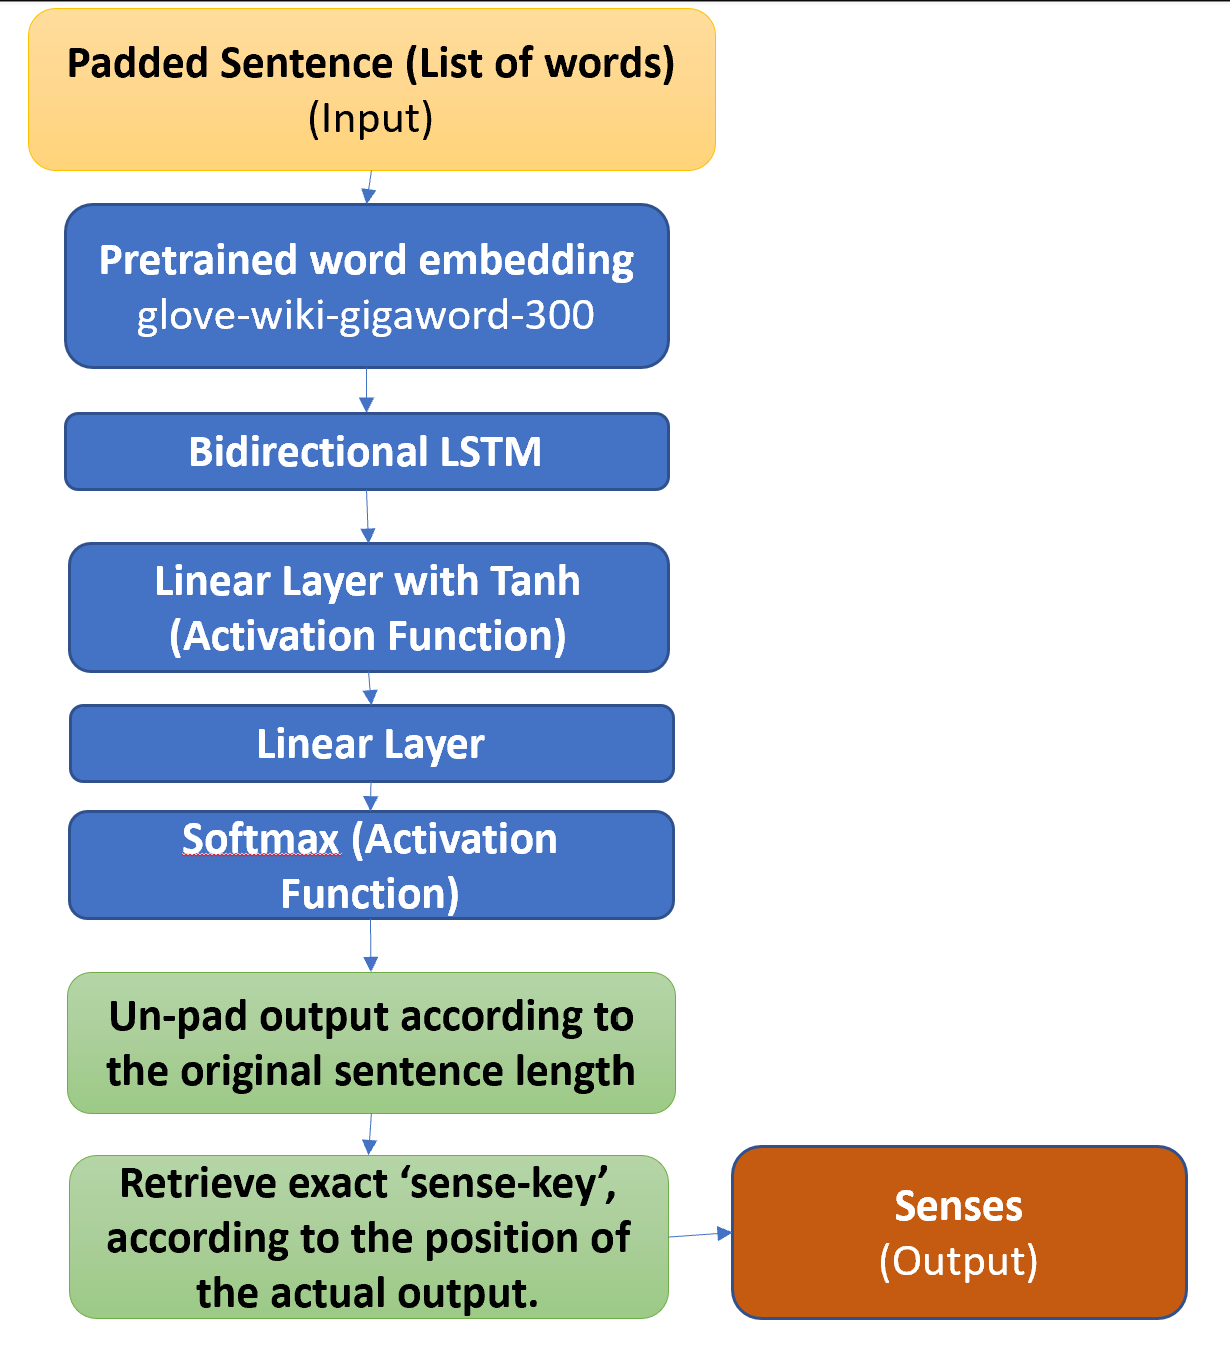

## Build Dataset and Dataloader

We need to give data in the form of batches. Batches is helpful for shorten training times. So for that we use **Build_Dataset** class to build our dataset in the form of tensor. Then we give this data to the **dataloader** torch function. To convert our data in the form of batches. 

Here, the batch size = 32.

In [ ]:
class Build_Dataset(Dataset):

    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence, sense = self.data[idx]
        return torch.tensor(sentence), torch.tensor(sense)

In [ ]:
train_data = []

for squence,tags in zip(train_sequences_padded,train_senses_padded):
  train_data.append((squence,tags))

test_data = []

for squence,tags in zip(test_sequences_padded,test_senses_padded):
  test_data.append((squence,tags))

val_data = []

for squence,tags in zip(val_sequences_padded,val_senses_padded):
  val_data.append((squence,tags))

In [ ]:
batch_size = 32


train_dataset = Build_Dataset(train_data)
val_dataset = Build_Dataset(val_data)
test_dataset = Build_Dataset(test_data)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
VOCAB_SIZE = len(words)+2

## Download Pre-trained Embedding
Here, I am using ***glove-wiki-gigaword-30***. It's better for our dataset, because our dataset is general english words

In [ ]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


## Create word embedding Matrix

In ***glove-wiki-gigaword-300*** have 400K vocabs. Most of the vocabs is not usefull because. we need only training dataset vocabs. So we extract embedding for those words. Which are available in our training vocabs. For `__PADDING__` we assign zeros value and for `__UNK__` we assign random values.

It's also take less computional power in our training

In [ ]:

OOV_TOKEN = '__UNK__'


embedding_dim = wv.vector_size
print(embedding_dim)

vocab_embedd = {}
embedding_matrix = np.zeros((len(wv.key_to_index) + 1, embedding_dim))
for i, word in enumerate(wv.key_to_index):
    vocab_embedd[word] = i + 1
    embedding_matrix[i+1] = wv[word]

vocab_embedd[OOV_TOKEN] = 0
embedding_matrix[0] = np.random.rand(embedding_dim)


300


In [ ]:
num_words = VOCAB_SIZE # 1 for padding, other one for UNK
embedding_matrix_for_data = torch.zeros((num_words, embedding_dim))
for i,word in index_words.items():
    if word in vocab_embedd:
        embedding_vector = embedding_matrix[vocab_embedd[word]]
        embedding_matrix_for_data[i] = torch.tensor(embedding_vector)
    else:
        embedding_matrix_for_data[i] = torch.tensor(embedding_matrix[0])

In [ ]:
embedding_matrix_for_data.shape

torch.Size([31976, 300])

In [ ]:
wv.vector_size

300

## Build Model

In [ ]:
class MODEL_1(nn.Module):
  
  def __init__(self, hidden_dim, output_dim,embedding_dim,dropout_value,weight):
    super(MODEL_1, self).__init__()
    self.hidden_size = hidden_dim
    self.output_size = output_dim

    self.embedding_layer =torch.nn.Embedding.from_pretrained(embedding_matrix_for_data,padding_idx=0,freeze=False)
    
    self.lstm = nn.LSTM(input_size=embedding_dim,
    hidden_size=hidden_dim,
    num_layers=1,
    bidirectional=True,
    batch_first=True)
    self.dropout1 = nn.Dropout(p=dropout_value)
    self.fc1 = nn.Linear(hidden_dim*2, 32)
    self.dropout2 = nn.Dropout(p=dropout_value)
    self.fc2 = nn.Linear(32, output_dim)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, input):
    embedded_sequences = self.embedding_layer(input)
    lstm_output, _ = self.lstm(embedded_sequences)
    x = self.dropout1(lstm_output)
    x = self.fc1(x)
    x = nn.Tanh()(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    preds = self.softmax(x)
    return preds


 The main metric here is accuracy, It measures the proportion of correct predictions made by a model out of the total number of predictions. 
 
 $$
\operatorname{Accuracy} = \frac{\operatorname{num\_correct\_predictions}}{\operatorname{num\_predictions}}
$$
 
 
 I am calculating the accuracy using the `predict()` and `remove_padding() `functions. The model I mentioned earlier predicts the output for the padded sentence, which is a list of words. However, the challenge lies in obtaining the output for the actual sentence, rather than the padded one. To address this, I utilize the `predict()` function, which removes the padding and provides the output for the original sentence.

Additionally, I only need the sense keys for words that are homonyms. To handle this, I assign the` __PADDING__` key to words that are not homonyms to maintain equal size. To filter out these non-homonym sense keys, I use the `remove_padding`() function, which removes them based on their position.

In [ ]:
def predict(model_1,test_dataset,test_tags,device,train=True):
  if train == False:
    model_1.eval()
    with torch.no_grad():
          pred_test = []
          true_test = []
          out = []
          for batch_idx_v, (sentences_v, tags_v) in enumerate(test_dataset):
              sentences_v = sentences_v.to(device)
              
              outputs_v = model_1(sentences_v)
              out.append(outputs_v)
              true_test.append(tags_v)
              pred_test.append(torch.argmax(outputs_v,-1))

          true_tags = []
          for i in range(len(true_test)):
            
            test_t = true_test[i]
            tags = [index_senses[int(j)] for j in list(test_t)][-len(test_tags[i]):]
            true_tags.append(tags)

          pred_tags = []
          for i in range(len(pred_test)):
          
            test_p = pred_test[i]
            tags = [index_senses[int(j)] for j in list(test_p)][-len(test_tags[i]):]
            pred_tags.append(tags)

  else:
    model_1.train()
    with torch.no_grad():
          pred_test = []
          true_test = []
          out = []
          for batch_idx_v, (sentences_v, tags_v) in enumerate(test_dataset):
              sentences_v = sentences_v.to(device)
              
              outputs_v = model_1(sentences_v)
              out.append(outputs_v)
              true_test.append(tags_v)
              pred_test.append(torch.argmax(outputs_v,-1))

          true_tags = []
          for i in range(len(true_test)):
            
            test_t = true_test[i]
            tags = [index_senses[int(j)] for j in list(test_t)][-len(test_tags[i]):]
            true_tags.append(tags)

          pred_tags = []
          for i in range(len(pred_test)):
          
            test_p = pred_test[i]
            tags = [index_senses[int(j)] for j in list(test_p)][-len(test_tags[i]):]
            pred_tags.append(tags)
    
    
  return true_tags,pred_tags,pred_test


def remove_padding(list_true,list_pred):
  a_true = []
  a_pred = []
  for i_true,i_pred in zip(list_true,list_pred):
    b_true = []
    b_pred = []
    for j,j_true,j_pred in zip(range(len(i_true)),i_true,i_pred):
      if j_true=='__PADDING__':
        pass
      else:
        b_true.append(j_true)
        b_pred.append(j_pred)
    a_true.append(b_true)
    a_pred.append(b_pred)

  return a_true,a_pred



def get_n_instances(l: List[List[Any]]) -> int:
    return sum(len(inner_l) for inner_l in l)

## Build Training Loop

In [ ]:
def training_loop_1(model,train_dataloader,val_dataloader,loss_function,optimizer,num_epochs,model_save,train_dataset,train_senses,val_dataset,val_senses,device=device):
  training_loss = []
  validation_loss = []
  validation_acc = []
  for epoch in range(num_epochs):

    # ------------------ Training -----------------------------------

    losses = []
    model.train()
    for batch_idx, (inputs, targets) in enumerate(tqdm(train_dataloader, unit="batch", total=len(train_dataloader))):
    
      inputs = inputs.to(device)
      
      targets = targets.view(-1).long().to(device)
   
      optimizer.zero_grad()

      outputs = model(inputs)
      outputs = outputs.view(-1, outputs.shape[-1])
   
      loss = loss_function(outputs,targets)
      losses.append(loss)
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0 and batch_idx != 0:
        
        if model_save == True:
          path = 'Model/'
          torch.save(model.state_dict(), f'{path}model_checkpoint_epoch-{epoch}+{batch_idx}.pth')

    mean_loss = sum(losses) / len(losses)
    training_loss.append(mean_loss.item())

    print('')
    sleep(0.01)
    print(f"Training Epoch {epoch+1} ==========> Training loss: {mean_loss:0.6f}")

    # ------------------ Validation -----------------------------------

    model.eval()
    with torch.no_grad():
     
      losses_v = []
      for batch_idx_v, (sentences_v, tags_v) in enumerate(val_dataloader):
          sleep(0.01)
          sentences_v = sentences_v.to(device)
         
          tags_v=tags_v.view(-1).long().to(device)
          
          outputs_v = model(sentences_v)
          outputs_v = outputs_v.view(-1, outputs_v.shape[-1])
         
          vloss = loss_function(outputs_v,tags_v)
          losses_v.append(vloss)
      mean_loss_v = sum(losses_v) / len(losses_v)
      validation_loss.append(float(mean_loss_v))
    

    # Accuracy Calculate
    true_sense_t,pred_sense_t,out = predict(model,val_dataset,val_senses,device,train=False)
    true_value_t,pred_value_t = remove_padding(true_sense_t,pred_sense_t)
    n_instances = get_n_instances(true_value_t)
    #print(f"# instances: {n_instances}")
    correct = 0
    for i, (senses_t, pred_t) in enumerate(zip(true_value_t, pred_value_t)):
        if len(senses_t) != len(pred_t):
            raise ValueError(
                f"For the sentence with idx {i}, the number of input WSD instances and the number of WSD instances "
                f"returned in predictions do not match: # input instances = {len(senses_t)}, # returned instances = "
                f"{len(pred_t)}")
        for sense, prediction in zip(senses_t, pred_t):
            if prediction in sense:
                correct += 1
    #print("ACCURACY",correct / n_instances)

    acc_v = correct / n_instances
    validation_acc.append(acc_v)
    print(f"Validation Epoch {epoch+1} ==========> Validation loss: {mean_loss_v:0.6f}, Validation Accuracy:{acc_v:0.6f}")
    print('')

  return training_loss,validation_loss,validation_acc

## Define Hyperparameters

In [ ]:
dropout_value = 0.4
denselayer_dim = 32
embedding_dim = embedding_dim
hidden_dim = 128
output_dim = len(index_senses)
num_epochs = 33
weight =embedding_matrix_for_data

In [ ]:
model_1 = MODEL_1(hidden_dim=hidden_dim, output_dim=output_dim,embedding_dim=embedding_dim,dropout_value=dropout_value,weight=weight).to(device)
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=0)

In [ ]:
model_1

MODEL_1(
  (embedding_layer): Embedding(31976, 300, padding_idx=0)
  (lstm): LSTM(300, 128, batch_first=True, bidirectional=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=32, out_features=1415, bias=True)
  (softmax): Softmax(dim=1)
)

## Training Model

In [ ]:
train_loss_m1,val_loss_m1,validation_acc_m1 = training_loop_1(
    model_1,
    train_dataloader,
    val_dataloader,
    criterion,optimizer,
    num_epochs,
    False,
    train_dataset,
    train_senses,
    val_dataset,
    val_senses,
    device,
    )

100%|██████████| 386/386 [00:09<00:00, 40.64batch/s]



Training Epoch 1 ==========> Training loss: 7.128369
Validation Epoch 1 ==========> Validation loss: 7.011395, Validation Accuracy:0.125116



100%|██████████| 386/386 [00:08<00:00, 46.39batch/s]



Training Epoch 2 ==========> Training loss: 6.957240
Validation Epoch 2 ==========> Validation loss: 6.911740, Validation Accuracy:0.225209



100%|██████████| 386/386 [00:08<00:00, 45.74batch/s]



Training Epoch 3 ==========> Training loss: 6.859469
Validation Epoch 3 ==========> Validation loss: 6.815115, Validation Accuracy:0.335496



100%|██████████| 386/386 [00:08<00:00, 45.94batch/s]



Training Epoch 4 ==========> Training loss: 6.789777
Validation Epoch 4 ==========> Validation loss: 6.744334, Validation Accuracy:0.397590



100%|██████████| 386/386 [00:08<00:00, 45.53batch/s]



Training Epoch 5 ==========> Training loss: 6.729466
Validation Epoch 5 ==========> Validation loss: 6.696477, Validation Accuracy:0.456905



100%|██████████| 386/386 [00:08<00:00, 44.93batch/s]



Training Epoch 6 ==========> Training loss: 6.674167
Validation Epoch 6 ==========> Validation loss: 6.651266, Validation Accuracy:0.503244



100%|██████████| 386/386 [00:08<00:00, 44.67batch/s]



Training Epoch 7 ==========> Training loss: 6.629315
Validation Epoch 7 ==========> Validation loss: 6.608318, Validation Accuracy:0.556070



100%|██████████| 386/386 [00:08<00:00, 44.22batch/s]



Training Epoch 8 ==========> Training loss: 6.587802
Validation Epoch 8 ==========> Validation loss: 6.583221, Validation Accuracy:0.583874



100%|██████████| 386/386 [00:08<00:00, 43.91batch/s]



Training Epoch 9 ==========> Training loss: 6.555907
Validation Epoch 9 ==========> Validation loss: 6.545078, Validation Accuracy:0.618165



100%|██████████| 386/386 [00:08<00:00, 43.70batch/s]



Training Epoch 10 ==========> Training loss: 6.529675
Validation Epoch 10 ==========> Validation loss: 6.527553, Validation Accuracy:0.630213



100%|██████████| 386/386 [00:08<00:00, 43.87batch/s]



Training Epoch 11 ==========> Training loss: 6.506310
Validation Epoch 11 ==========> Validation loss: 6.512495, Validation Accuracy:0.643188



100%|██████████| 386/386 [00:08<00:00, 43.75batch/s]



Training Epoch 12 ==========> Training loss: 6.487770
Validation Epoch 12 ==========> Validation loss: 6.499025, Validation Accuracy:0.662651



100%|██████████| 386/386 [00:08<00:00, 43.68batch/s]



Training Epoch 13 ==========> Training loss: 6.470843
Validation Epoch 13 ==========> Validation loss: 6.488110, Validation Accuracy:0.670065



100%|██████████| 386/386 [00:08<00:00, 43.58batch/s]



Training Epoch 14 ==========> Training loss: 6.457393
Validation Epoch 14 ==========> Validation loss: 6.478695, Validation Accuracy:0.683040



100%|██████████| 386/386 [00:08<00:00, 43.70batch/s]



Training Epoch 15 ==========> Training loss: 6.448186
Validation Epoch 15 ==========> Validation loss: 6.473297, Validation Accuracy:0.691381



100%|██████████| 386/386 [00:08<00:00, 43.73batch/s]



Training Epoch 16 ==========> Training loss: 6.439944
Validation Epoch 16 ==========> Validation loss: 6.467994, Validation Accuracy:0.700649



100%|██████████| 386/386 [00:08<00:00, 43.47batch/s]



Training Epoch 17 ==========> Training loss: 6.430601
Validation Epoch 17 ==========> Validation loss: 6.461864, Validation Accuracy:0.698795



100%|██████████| 386/386 [00:08<00:00, 43.45batch/s]



Training Epoch 18 ==========> Training loss: 6.423985
Validation Epoch 18 ==========> Validation loss: 6.459646, Validation Accuracy:0.707136



100%|██████████| 386/386 [00:08<00:00, 43.54batch/s]



Training Epoch 19 ==========> Training loss: 6.418981
Validation Epoch 19 ==========> Validation loss: 6.456955, Validation Accuracy:0.710843



100%|██████████| 386/386 [00:08<00:00, 43.50batch/s]



Training Epoch 20 ==========> Training loss: 6.414365
Validation Epoch 20 ==========> Validation loss: 6.454681, Validation Accuracy:0.711770



100%|██████████| 386/386 [00:08<00:00, 43.54batch/s]



Training Epoch 21 ==========> Training loss: 6.409889
Validation Epoch 21 ==========> Validation loss: 6.454204, Validation Accuracy:0.704356



100%|██████████| 386/386 [00:08<00:00, 43.45batch/s]



Training Epoch 22 ==========> Training loss: 6.406496
Validation Epoch 22 ==========> Validation loss: 6.449956, Validation Accuracy:0.724745



100%|██████████| 386/386 [00:08<00:00, 43.53batch/s]



Training Epoch 23 ==========> Training loss: 6.402941
Validation Epoch 23 ==========> Validation loss: 6.449110, Validation Accuracy:0.718258



100%|██████████| 386/386 [00:08<00:00, 43.47batch/s]



Training Epoch 24 ==========> Training loss: 6.400182
Validation Epoch 24 ==========> Validation loss: 6.444711, Validation Accuracy:0.719184



100%|██████████| 386/386 [00:08<00:00, 43.29batch/s]



Training Epoch 25 ==========> Training loss: 6.396392
Validation Epoch 25 ==========> Validation loss: 6.443347, Validation Accuracy:0.726599



100%|██████████| 386/386 [00:08<00:00, 43.28batch/s]



Training Epoch 26 ==========> Training loss: 6.393076
Validation Epoch 26 ==========> Validation loss: 6.442826, Validation Accuracy:0.721038



100%|██████████| 386/386 [00:08<00:00, 43.26batch/s]



Training Epoch 27 ==========> Training loss: 6.389731
Validation Epoch 27 ==========> Validation loss: 6.440917, Validation Accuracy:0.729379



100%|██████████| 386/386 [00:08<00:00, 43.31batch/s]



Training Epoch 28 ==========> Training loss: 6.386341
Validation Epoch 28 ==========> Validation loss: 6.440700, Validation Accuracy:0.728452



100%|██████████| 386/386 [00:08<00:00, 42.92batch/s]



Training Epoch 29 ==========> Training loss: 6.385119
Validation Epoch 29 ==========> Validation loss: 6.442541, Validation Accuracy:0.730306



100%|██████████| 386/386 [00:09<00:00, 42.89batch/s]



Training Epoch 30 ==========> Training loss: 6.382962
Validation Epoch 30 ==========> Validation loss: 6.440455, Validation Accuracy:0.721038



100%|██████████| 386/386 [00:08<00:00, 43.15batch/s]



Training Epoch 31 ==========> Training loss: 6.382163
Validation Epoch 31 ==========> Validation loss: 6.436476, Validation Accuracy:0.732159



100%|██████████| 386/386 [00:08<00:00, 43.13batch/s]



Training Epoch 32 ==========> Training loss: 6.377689
Validation Epoch 32 ==========> Validation loss: 6.435783, Validation Accuracy:0.729379



100%|██████████| 386/386 [00:08<00:00, 43.18batch/s]



Training Epoch 33 ==========> Training loss: 6.375847
Validation Epoch 33 ==========> Validation loss: 6.436602, Validation Accuracy:0.727525



Our model demonstrates significant improvement in validation accuracy after training for 33 epochs, with consistent reduction in losses over time. I experimented with training the model for 100 epochs, but the validation accuracy did not increase further. Therefore, I made the decision to train the model only for 33 epochs. Regarding other hyperparameters, I conducted various experiments by altering the number of layers and increasing dropout rates, but none of these changes resulted in improved model accuracy. Ultimately, the architecture described earlier yielded the highest accuracy.

Although our model is not state-of-the-art the accuracy is quite well. Now it's time to check test accuracy

## Visualize Training and Validation lossess

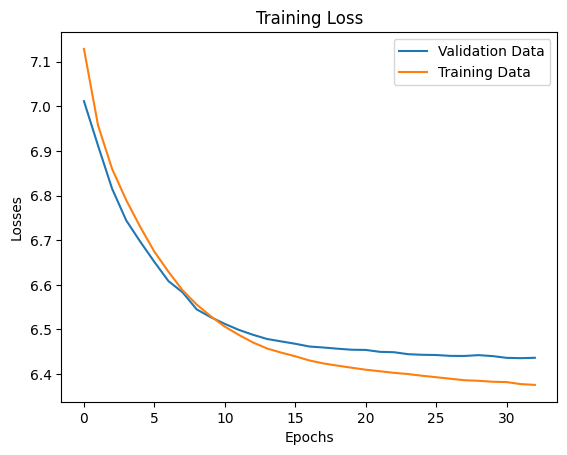

In [ ]:
plt.title("Training Loss")
plt.plot(val_loss_m1,label='Validation Data')
plt.plot(train_loss_m1,label='Training Data')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

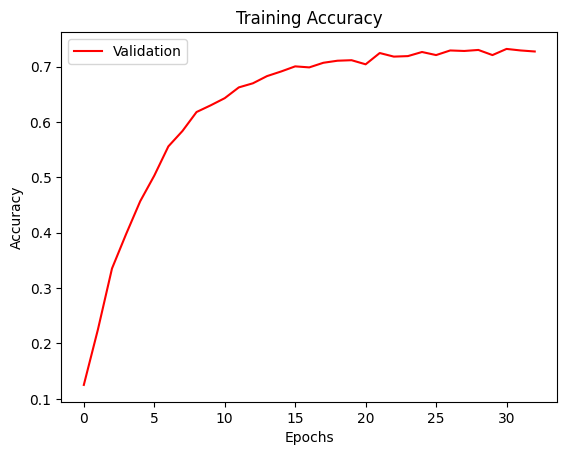

In [ ]:
plt.title("Training Accuracy")
plt.plot(validation_acc_m1,'r',label='Validation',)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Evalute Model

For test accuracy, Again I am using the same `predict()` and `remove_padding() `functions to give filtered senses. Then these filtered senses, we use to calculate accuracy, The main metric here is accuracy, It measures the proportion of correct predictions made by a model out of the total number of predictions. Here I am using two different types of functions to calculate accuracy.

1. Seqeval accuracy
2. Code to calculate accuracy manually.

In [ ]:
true_tags_m1,pred_tags_m1,out = predict(model_1,test_dataset,test_senses,device,train=False)
true_value,pred_value = remove_padding(true_tags_m1,pred_tags_m1)

1. Seqeval accuracy is a popular library-specific function used in NLP tasks, which evaluates sequence labeling tasks such as named entity recognition or part-of-speech tagging. It measures accuracy by comparing the predicted sequence labels to the ground truth labels.

In [ ]:
print(accuracy_score(true_value,pred_value))

0.7122171945701358


2. On the other hand, the manual calculation method refers to a custom code implementation to calculate accuracy. It involves comparing the predicted outputs to the expected outputs and calculating the proportion of correct predictions out of the total predictions made.

In [ ]:
n_instances = get_n_instances(true_value)
print(f"# instances: {n_instances}")
correct = 0
for i, (senses, predictions) in enumerate(zip(true_value, pred_value)):
  for sense, prediction in zip(senses, predictions):
            if prediction in sense:
                correct += 1

print(correct / n_instances)


# instances: 1105
0.7122171945701358


The second model, here I am use is RoBERTA, Although Bidirectional LSTM (BiLSTM) models are effective at capturing contextual dependencies in a sequential manner by processing input in both forward and backward directions. The reason behind that is in WSD, BiLSTM with pretrained word embedding (Glove) give 'same’ embedding for same words. Although the contexts of words are different, Suppose I have two sentences: "He didn't receive fair treatment" and "Fun fair in New York City this summer. In both sentences the word 'fair' has two different meaning according to the context, but  (Glove) embedding give both 'fair' word embedding same. The transformer-based model RoBERTa, on the other hand, is capable of effectively capturing contextual data. Transformers, like RoBERTa, use self-attention mechanisms to recognize relationships between words in a sentence, which improves their ability to effectively recognize contextual information. RoBERTa can therefore learn contextualized word embeddings that change depending on the precise context in which the word appears, making it better suitable for tasks like word sense disambiguation. Here I am using pretrained RoBERTa model ("roberta-base") with fine-tuned, Then I use dropout layer of 0.2 to prevent overfitting then a fully connected layer with a softmax activation function is used to the RoBERTa output to classify the data. 

# Why we use Roberta Model? Instead of BERT or other transformer models.

I tried BERT, BART and ALBERT for WSD task but the accuracy is not well enough and hence I chose ROBERTA due to following reasons:

1. ROBERTA surpasses BERT in WSD tasks because it is trained on a much larger corpus. This extensive training data enables ROBERTA to acquire a wider range of language representations, enhancing its ability to accurately capture word senses and contextual information. The increased coverage offered by the larger pretraining corpus directly contributes to its improved performance in WSD tasks.

2. ROBERTA benefits from a longer training duration compared to BERT, which enables it to enhance its language modeling capabilities. The extended training steps provide ROBERTA with the opportunity to fine-tune its representations of word meanings and context, resulting in more accurate and nuanced representations. This prolonged training duration significantly contributes to ROBERTA's improved performance in disambiguating word senses in WSD tasks.

3. In contrast to BERT's fixed masking pattern, ROBERTA utilizes a dynamic masking strategy during pretraining. This means that for each training instance, ROBERTA applies different masking patterns. This dynamic masking approach helps the model generalize more effectively to unseen data and reduces its dependence on specific positional information. This increased flexibility proves advantageous in WSD tasks, where understanding contextual information is crucial for accurate sense disambiguation.

In [ ]:
label_to_id = {n: i for i, n in enumerate(senses_keys)}
id_to_label = {i: n for n, i in label_to_id.items()}

In [ ]:
label_all_tokens = False

In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')
transformer_model = AutoModel.from_pretrained("roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/NLP-HW2/Roberta_Tokenizer')
transformer_model.save_pretrained("/content/drive/MyDrive/NLP-HW2/Roberta_Model")

In the previous BiLSTM model with pretrained embedding, creating a unique vocabulary for the input allows us to convert words to numbers and handle the out-of-vocabulary (OOV) problem. Padding is also applied to handle variable-length data. However, using a custom string-to-number encoding in a transformer can lead to a loss of word-level information and linguistic context. This loss can hinder the model's ability to understand and capture meaningful relationships between words in the input text.

To resolve this issue, we have to use transformer's tokenizer. Tokenizers for transformer models are essential for transforming raw text into a format that can be used by the models. Tokenization, vocabulary encoding, handling of OOV words, special tokens, and attention masking are all taken handle by them, ensuring that the model can effectively process and understand natural language inputs.

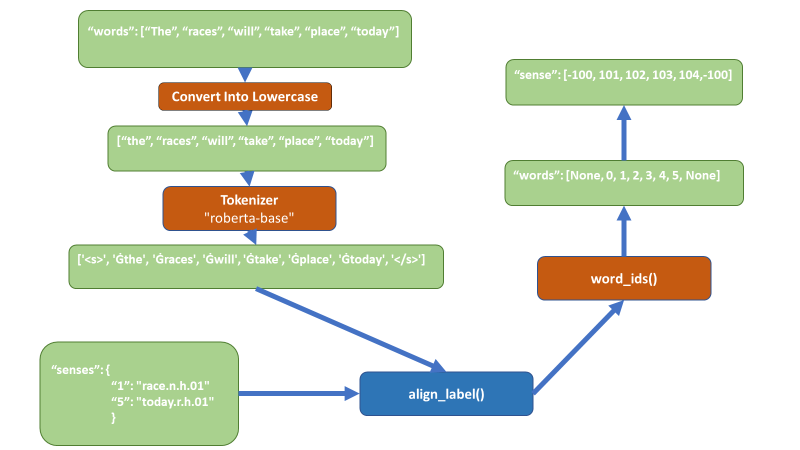

In [ ]:
def align_label(texts, labels,max_length,tokenizer):
    #tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base',add_prefix_space=True)
    tokenized_inputs = tokenizer(texts, padding='max_length', max_length=max_length, truncation=True,is_split_into_words=True)

    word_ids = tokenized_inputs.word_ids()

    previous_word_idx = None
    label_ids = []

    for word_idx in word_ids:

        if word_idx is None:
            label_ids.append(-100)

        elif word_idx != previous_word_idx:
            try:
                label_ids.append(label_to_id[labels[word_idx]])
            except:
                label_ids.append(-100)
        else:
            try:
                label_ids.append(label_to_id[labels[word_idx]] if label_all_tokens else -100)
            except:
                label_ids.append(-100)
        previous_word_idx = word_idx

    return label_ids

In [ ]:
MAX_LEN

289

## Build Dataset Class

In [ ]:
class RobertaDataset(Dataset):
    def __init__(self, word_list,label, max_length=289):
        self.word_list = word_list
        self.max_length = max_length
        self.label = label
        self.tokenizer = RobertaTokenizerFast.from_pretrained('/content/drive/MyDrive/NLP-HW2/Roberta_Tokenizer',add_prefix_space=True)
        

    def __len__(self):
        return len(self.word_list)

    def __getitem__(self, index):
        word = self.word_list[index]
        label = align_label(word, self.label[index],self.max_length,self.tokenizer)

        # Tokenize the word and add special tokens
        encoding = self.tokenizer(
            word,
            add_special_tokens=True,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt',
            is_split_into_words=True
        )

        # Get the input IDs and attention mask
        input_ids = encoding['input_ids'][0]
        attention_mask = encoding['attention_mask'][0]
        #attention_mask = encoding['attention_mask']
        #token_type_ids = encoding['token_type_ids']
        labels = torch.LongTensor(label)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels':labels
        }

In [ ]:
train_data = []

for squence,tags in zip(df_words_train,df_sense_train):
  train_data.append((squence,tags))


test_data = []

for squence,tags in zip(df_words_test,df_sense_test):
  test_data.append((squence,tags))

val_data = []

for squence,tags in zip(df_words_val,df_sense_val):
  val_data.append((squence,tags))


In [ ]:
label_all_tokens = False
train_dataset = RobertaDataset(df_words_train,df_sense_train)
test_dataset = RobertaDataset(df_words_test,df_sense_test)
val_dataset = RobertaDataset(df_words_val,df_sense_val)

In [ ]:
batch_size = 10


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
for i in train_dataloader:
  print(i)
  print(i.keys())
  break

{'input_ids': tensor([[    0,  1684,    14,  ...,     1,     1,     1],
        [    0, 45518,    79,  ...,     1,     1,     1],
        [    0,   209,  5550,  ...,     1,     1,     1],
        ...,
        [    0,    42,     8,  ...,     1,     1,     1],
        [    0,   475,  4926,  ...,     1,     1,     1],
        [    0,    71,    14,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        ...,
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100]])}
dict_keys(['input_ids', 'attention_mask', 'labels

In RobertaModel class, I take some motivation from NER notebook delivered in classroom. 

## Build Model

In [ ]:
class RobertaModel(torch.nn.Module):

    def __init__(self, num_labels: int, fine_tune_lm: bool = True, *args, **kwargs)-> None:

        super(RobertaModel, self).__init__()

        self.num_labels = num_labels
        self.transformer_model = AutoModel.from_pretrained("/content/drive/MyDrive/NLP-HW2/Roberta_Model", output_hidden_states=True)
        if not fine_tune_lm:
            for param in self.transformer_model.parameters():
                param.requires_grad = False
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier = torch.nn.Linear(
            self.transformer_model.config.hidden_size, num_labels, bias=False
        )
    def forward(
        self,
        input_ids: torch.Tensor = None,
        attention_mask: torch.Tensor = None,
        token_type_ids: torch.Tensor = None,
        labels: torch.Tensor = None,
        compute_predictions: bool = False,
        compute_loss: bool = True,
        *args,
        **kwargs,
    ) -> torch.Tensor:
        # group model inputs and pass to the model
        model_kwargs = {
          "input_ids": input_ids, 
          "attention_mask": attention_mask
        }
        # not every model supports token_type_ids
        if token_type_ids is not None:
          model_kwargs["token_type_ids"] = token_type_ids
        transformers_outputs = self.transformer_model(**model_kwargs)
        # we would like to use the sum of the last four hidden layers
        transformers_outputs_sum = torch.stack(transformers_outputs.hidden_states[-4:], dim=0).sum(dim=0)
        transformers_outputs_sum = self.dropout(transformers_outputs_sum)
        
        logits = self.classifier(transformers_outputs_sum)

        output = {"logits": logits}

        if compute_predictions:
            predictions = logits.argmax(dim=-1)
            output["predictions"] = predictions

        if compute_loss and labels is not None:
            output["loss"] = self.compute_loss(logits, labels)

        return output

    def compute_loss(
        self, logits: torch.Tensor, labels: torch.Tensor
    ) -> torch.Tensor:
        
        return F.cross_entropy(
            logits.view(-1, self.num_labels),
            labels.view(-1),
            ignore_index=-100,
        )

## Define Hyperparameters

In [ ]:
epochs = 6

In [ ]:
model = RobertaModel(len(label_to_id.keys()), fine_tune_lm=True)
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  war

## Build Training Loop

In [ ]:
def train_model2(model,train_dataloader,val_dataloader,optimizer,epochs,model_save,path=None,device=device):
  number_of_training_steps = len([b for b in train_dataloader])
  training_loss = []
  validation_loss = []
  validation_acc = []
  for epoch in range(epochs):  # loop over the dataset multiple times
    losses = []
    model.train()
    print('Epoch = ',epoch+1)
    batch_pbar = tqdm(enumerate(train_dataloader), total=number_of_training_steps)
    for i, batch in batch_pbar:
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      # move batch data to the specified device
      batch = {k: v.to(device) for k, v in batch.items()}
      #print(batch)
      # ** operator converts batch items in named arguments, (e.g. 'input_ids', 'attention_mask_ids' ...), taken as input by the model forward pass
      outputs = model(**batch)
      loss = outputs["loss"]
      loss.backward()
      optimizer.step()

      losses.append(loss.item())
      batch_pbar.set_postfix({'loss': loss.item()})



      if i % 500 == 0 and i != 0:
        
        if model_save == True:
          if path == None:
            path = 'Model/'
          torch.save(model.state_dict(), f'{path}model_checkpoint_epoch-{epoch}+{i}.pth')
    
    mean_loss = sum(losses) / len(losses)
    training_loss.append(mean_loss)
    #batch_pbar = tqdm(enumerate(train_dataloader), total=number_of_training_steps)

    # -----------------------------Validation ------------------------------------



    model.eval()
    with torch.no_grad():
      predictions, labels = [], []
      losses_v = []
      for batch in tqdm(val_dataloader):
          batch = {k: v.to(device) for k, v in batch.items()}
          outputs = model(**batch)
          loss_v = outputs["loss"]
          losses_v.append(loss_v)
          pred_val = model(**batch, compute_predictions=True)
          y_true = batch["labels"].tolist()
          

          y_pred = pred_val["predictions"].tolist()
          
          #print(y_true)
          #print(y_pred)
          true_predictions = [
              [id_to_label[p] for (p, l) in zip(pred, gold_label) if l != -100]
              for pred, gold_label in zip(y_pred, y_true)
          ]
          true_labels = [
              [id_to_label[l] for (p, l) in zip(pred, gold_label) if l != -100]
              for pred, gold_label in zip(y_pred, y_true)
          ]

          #print(true_labels)
          #print(true_predictions)
        
          
          predictions += true_predictions
          labels += true_labels

    n_instances = get_n_instances(labels)
    print(f"# instances: {n_instances}")
    correct = 0
    for i, (senses_v, pred) in enumerate(zip(labels, predictions)):
        if len(senses_v) != len(pred):
            raise ValueError(
                f"For the sentence with idx {i}, the number of input WSD instances and the number of WSD instances "
                f"returned in predictions do not match: # input instances = {len(senses_v)}, # returned instances = "
                f"{len(pred)}")
        for sense, prediction in zip(senses_v, pred):
            if prediction in sense:
                correct += 1
    #print("ACCURACY",correct / n_instances)
    mean_loss_v = sum(losses_v) / len(losses_v)
    acc_v = correct / n_instances
    validation_loss.append(mean_loss_v)
    validation_acc.append(acc_v)
    print(f"Validation Epoch {epoch+1} ==========> Validation loss: {mean_loss_v:0.6f}, Validation Accuracy:{acc_v:0.6f}")
    print('')

  return training_loss,validation_loss,validation_acc

In [ ]:
train_loss_m2,val_loss_m2,validation_acc_m2 =train_model2(model,train_dataloader,val_dataloader,optimizer,epochs,model_save=True,path='/content/drive/MyDrive/NLP-HW2/Model/',device=device)

Epoch =  1


100%|██████████| 69/69 [00:23<00:00,  2.98it/s]


# instances: 1063
Validation Epoch 1 ==========> Validation loss: 0.994006, Validation Accuracy:0.828786

Epoch =  2


100%|██████████| 69/69 [00:23<00:00,  2.96it/s]


# instances: 1063
Validation Epoch 2 ==========> Validation loss: 0.662298, Validation Accuracy:0.871119

Epoch =  3


100%|██████████| 69/69 [00:23<00:00,  2.97it/s]


# instances: 1063
Validation Epoch 3 ==========> Validation loss: 0.575439, Validation Accuracy:0.888993

Epoch =  4


100%|██████████| 69/69 [00:23<00:00,  2.97it/s]


# instances: 1063
Validation Epoch 4 ==========> Validation loss: 0.607599, Validation Accuracy:0.895579

Epoch =  5


100%|██████████| 69/69 [00:23<00:00,  2.98it/s]


# instances: 1063
Validation Epoch 5 ==========> Validation loss: 0.549021, Validation Accuracy:0.898401

Epoch =  6


100%|██████████| 69/69 [00:23<00:00,  3.00it/s]

# instances: 1063
Validation Epoch 6 ==========> Validation loss: 0.586990, Validation Accuracy:0.901223



RoBERTa Transformer model gives high-performance accuracy of about 90% accuracy on the 6th epoch.

## Visualize Training and Validation lossess

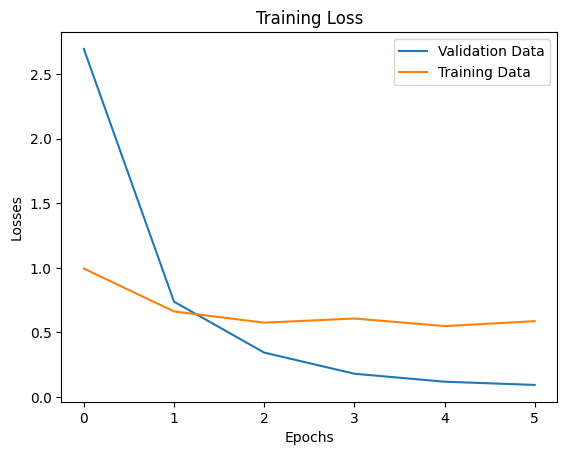

In [ ]:
plt.title("Training Loss")
plt.plot(train_loss_m2,label='Validation Data')
plt.plot([i.cpu() for i in val_loss_m2],label='Training Data')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

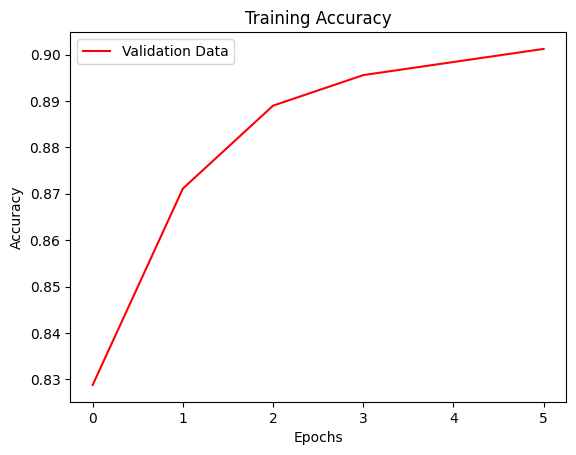

In [ ]:
plt.title("Training Accuracy")
plt.plot(validation_acc_m2,'r',label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Evalute Model

It's time to test our model in testing dataset

In [ ]:
label_to_id = {n: i for i, n in enumerate(senses_keys)}
id_to_label = {i: n for n, i in label_to_id.items()}

In [ ]:
model = RobertaModel(len(label_to_id.keys()), fine_tune_lm=True)
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
if device.type == 'cpu':
  model.load_state_dict(torch.load('/content/drive/MyDrive/NLP-HW2/Model/model_checkpoint_epoch-5+1000.pth',map_location=torch.device('cpu')))
else:
  model.load_state_dict(torch.load('/content/drive/MyDrive/NLP-HW2/Model/model_checkpoint_epoch-5+1000.pth'))
model.eval()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaModel(
  (transformer_model): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNor

In [ ]:
class RobertaDataset(Dataset):
    def __init__(self, word_list,label, max_length=289):
        self.word_list = word_list
        self.max_length = max_length
        self.label = label
        self.tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base',add_prefix_space=True)
        

    def __len__(self):
        return len(self.word_list)

    def __getitem__(self, index):
        word = self.word_list[index]
        label = align_label(word, self.label[index],self.max_length,self.tokenizer)

        # Tokenize the word and add special tokens
        encoding = self.tokenizer(
            word,
            add_special_tokens=True,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt',
            is_split_into_words=True
        )

        # Get the input IDs and attention mask
        input_ids = encoding['input_ids'][0]
        attention_mask = encoding['attention_mask'][0]
        #attention_mask = encoding['attention_mask']
        #token_type_ids = encoding['token_type_ids']
        labels = torch.LongTensor(label)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels':labels
        }

In [ ]:
test_labels = []
for i in instence_ids_list_test:
  test_label = ['__PADDING__']*MAX_LEN
  for j in i:
    test_label[j]='yr.n.h.01'
  test_labels.append(test_label)

In [ ]:
label_all_tokens = False
test_dataset = RobertaDataset(df_words_test,test_labels)

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
for i in test_dataloader:
  print(i)
  break

{'input_ids': tensor([[    0,    51,  2967,    14,  2156,  1712,  3330,   228,   715,     9,
            10,  7728,     9, 31420, 12589,   521,     8,   379,   228,   715,
             9,     5,  2790,  3277,  2047,    24,   505,     7,   697,    11,
         10753,    19,     5, 29500,     9,    49,  6825,  2156,   129,   290,
           228,   715,     9,     5, 14917,  1173,   521,    56,    42,  6866,
           479,     2,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,  

In [ ]:
def evalution(model,test_dataloader,id_to_label,device):
  model.eval()
  predictions, labels = [], []
  #testing_dataloader_check = DataLoader(testing_data)

  with torch. no_grad():
    for i in tqdm(test_dataloader):
      batch = {k: v.to(device) for k, v in i.items()}
      #print(batch['input_ids'])
      outputs = model(**batch, compute_predictions=True)
      y_true = batch["labels"].tolist()
      y_pred = outputs["predictions"].tolist()
      true_predictions = [
            [id_to_label[p] for (p, l) in zip(pred, gold_label) if l != -100]
            for pred, gold_label in zip(y_pred, y_true)
        ]
      predictions += true_predictions

  return predictions


In [ ]:
predictions = evalution(model,test_dataloader,id_to_label,device)

100%|██████████| 686/686 [00:20<00:00, 33.50it/s]


In [ ]:
def remove_padding_true(df_sense_test):
  true_labels = []
  for i in df_sense_test:
    true_label =[]
    for j in i:
      if j == '__PADDING__':
        pass
      else:
        true_label.append(j)
    true_labels.append(true_label)
  return true_labels

In [ ]:
true_labels = remove_padding_true(df_sense_test)

In [ ]:
print(predictions)
print(true_labels)

[['found.v.h.09', 'pupil.n.h.01', 'pupil.n.h.01'], ['nightingale.n.h.02'], ['land.n.h.02'], ['scrap.n.h.02', 'min.n.h.03', 'jerk.v.h.01'], ['fry.n.h.05', 'school.n.h.01'], ['lb.n.h.02', 'tv.n.h.01'], ['c.n.h.03', 'let.v.h.01'], ['player.n.h.01', 'sound.v.h.01'], ['fit.v.h.01'], ['veer.v.h.01', 'fit.v.h.01'], ['pay.v.h.01'], ['fry.n.h.05', 'holiday.n.h.02'], ['mood.n.h.01'], ['homo.n.h.01', 'player.n.h.01'], ['holiday.n.h.02'], ['let.v.h.01'], ['spell.n.h.02'], ['pack.v.h.01'], ['g.n.h.01', 'quack.n.h.02', 'bloom.v.h.01', 'c.n.h.01', 'g.n.h.01'], ['tweed.n.h.02'], ['job.n.h.02'], ['test.n.h.01', 'gal.n.h.03', 'count.n.h.01', 'cc.n.h.07'], ['cipher.n.h.01', 'compact.v.h.01', 'shape.n.h.02'], ['recount.v.h.01'], ['deal.n.h.03'], ['grade.n.h.02', 'day.n.h.02'], ['london.n.h.01'], ['land.n.h.02', 'land.n.h.02'], ['oct.n.h.01'], ['centre.n.h.02'], ['express.v.h.01'], ['found.v.h.03'], ['bar.n.h.01', 'merchant.n.h.02', 'fur.n.h.02'], ['yr.n.h.01', 'washington.n.h.01', 'found.v.h.06'], ['yr.n.

In [ ]:
print(accuracy_score(true_labels,predictions))

0.890497737556561


In [ ]:
n_instances = get_n_instances(true_labels)
print(f"# instances: {n_instances}")
correct = 0
for i, (senses, pred) in enumerate(zip(true_labels, predictions)):
  for sense, prediction in zip(senses, pred):
            if prediction in sense:
                correct += 1

print(correct / n_instances)


# instances: 1105
0.890497737556561


Oh great! Our RoBERTa transformer model gives approx 89% accuracy on testing dataset

In [ ]:


warnings.filterwarnings("ignore")

# load_metric is a huggingface utility to load the most-used metrics in ML.
metric = load_metric("seqeval")
scores = metric.compute(predictions=predictions, references=true_labels)
for k, v in scores.items():
    print(f"{k}: {v}")

.n.h.01: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 8}
.n.h.02: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 3}
.n.h.03: {'precision': 1.0, 'recall': 0.75, 'f1': 0.8571428571428571, 'number': 4}
.n.h.05: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2}
.n.h.06: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1}
.n.h.08: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 5}
.n.h.14: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2}
.n.h.16: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1}
a.n.h.01: {'precision': 0.75, 'recall': 1.0, 'f1': 0.8571428571428571, 'number': 3}
a.n.h.05: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 1}
ab.n.h.03: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2}
ace.n.h.02: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2}
ack.n.h.01: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2}
ack.n.h.02: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 1}
ack.v.h.01: {'pre

# Conclusion

This paper presented a multiclass classification model for WSD based on BiLSTMs with pretrained word embedding (Glove) and RoBERTa transformer model. We show that the RoBERTa transformer model works better compared to the Baseline model because it is capable of effectively learning contextualized word embeddings that change depending on the precise context in which the word appears. We also enhance our model accuracy by using models like (GlossBERT, EWISER, BEM etc)